## Task: Guest Journey Patterns
* Use process mining or sequence analysis to identify common guest journey paths.
* Compare these patterns across segments to uncover opportunities for
personalization and operational improvements.

## Importing from Google Drive

In [ ]:
# Importing From Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Import packages

In [ ]:
# Importing The Necessary Packages

# 1. pandas - to be used for data cleaning
import pandas as pd

# 2. numpy - to be used for numerical computing
import numpy as np

# 3. matplotlib - to be used for data visualizations
import matplotlib.pyplot as plt

# 4. seaborn - to be used for data visualizations
import seaborn as sns

# 5. sklearn - to be used for Machine Learning implementation
import sklearn

# 6. to generate Sankey diagram
from collections import Counter
import plotly.graph_objects as go

## Import data

In [ ]:
# Specify the file path of the excel file
file_path = '/content/drive/MyDrive/uss_survey_responses.xlsx'

# Read the excel file into Google Colab using read_excel
df = pd.read_excel(file_path)

# Display the first few rows of the dataset
print(df.head())

               time_entry               Email Address                     q1  \
0 2025-03-01 21:57:59.742       tada.maenth@gmail.com         Solo Traveller   
1 2025-03-01 23:33:19.213        amelia.low@gmail.com  Visiting With Friends   
2 2025-03-03 20:46:45.315     funwenxin2003@gmail.com  Visiting With Friends   
3 2025-03-03 21:54:52.840  tianyuan.zhang03@gmail.com  Visiting With Friends   
4 2025-03-03 21:57:59.510   chia.kwang.yang@gmail.com         Solo Traveller   

                 q2_1    q2_2     q3              q4_1              q4_2  \
0  13 To 20 Years Old    Male  Local   5 To 10 Minutes  10 To 20 Minutes   
1  13 To 20 Years Old  Female  Local  20 To 30 Minutes   5 To 10 Minutes   
2  21 To 34 Years Old  Female  Local  20 To 30 Minutes  30 To 60 Minutes   
3  21 To 34 Years Old  Female  Local  10 To 20 Minutes   5 To 10 Minutes   
4  21 To 34 Years Old    Male  Local  20 To 30 Minutes    I Do Not Visit   

               q4_3              q4_4  ...  \
0   5 To 10 Minu

In [ ]:
# Read in clustered data from Subgroup A, Question 2
clustered_df = pd.read_csv('/content/drive/MyDrive/dsa3101_clustered_data.csv')

## Data cleaning

Here is a description of the what each of the various columns of the dataset represent:

<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <style>
        table {
            width: 50%;
            border-collapse: collapse;
            margin: 20px 0;
        }
        th, td {
            border: 1px solid black;
            padding: 10px;
            text-align: center;
        }
    </style>
</head>
<body>
    <table>
        <thead>
            <tr>
                <th>Column Name</th>
                <th>Description Of Column</th>
            </tr>
        </thead>
        <tbody>
            <tr>
                <td>q1</td>
                <td>Which type of theme park visitor best describes you?</td>
            </tr>
            <tr>
                <td>q2_1</td>
                <td>What is your age range?</td>
            </tr>
            <tr>
                <td>q2_2</td>
                <td>What is your gender?</td>
            </tr>
            <tr>
                <td>q3</td>
                <td>Are you a tourist or a local?</td>
            </tr>
            <tr>
                <td>q4_1</td>
                <td>For the category on thrill rides, what is the average time you queued for?</td>
            </tr>
            <tr>
                <td>q4_2</td>
                <td>For the category on interactive exhibits, what is the average time you queued for?</td>
            </tr>
            <tr>
                <td>q4_3</td>
                <td>For the category on performances, what is the average time you queued for?</td>
            </tr>
            <tr>
                <td>q4_4</td>
                <td>For the category on food and dining, what is the average time you queued for?</td>
            </tr>
            <tr>
                <td>q5_1</td>
                <td>For the category on thrill rides, what is considered an unacceptable wait time? (Integer in Minutes)</td>
            </tr>
            <tr>
                <td>q5_2</td>
                <td>For the category on interactive exhibits, what is considered an unacceptable wait time? (Integer in Minutes)</td>
            </tr>
            <tr>
                <td>q5_3</td>
                <td>For the category on performances, what is considered an unacceptable wait time? (Integer in Minutes)</td>
            </tr>
            <tr>
                <td>q5_4</td>
                <td>For the category on food and dining, what is considered an unacceptable wait time? (Integer in Minutes)</td>
            </tr>
            <tr>
                <td>q6</td>
                <td>The type of attractions you enjoy the most when visiting USS</td>
            </tr>
            <tr>
                <td>q7</td>
                <td>Factors that will influence your decision to visit a theme park like USS?</td>
            </tr>
            <tr>
                <td>q8</td>
                <td>What type of events influence your decision to visit?</td>
            </tr>
            <tr>
                <td>q9</td>
                <td>How long do you usually spend at USS? (Integer in Hours)</td>
            </tr>
            <tr>
                <td>q10</td>
                <td>When do you usually visit theme parks or attractions like USS?</td>
            </tr>
            <tr>
                <td>q11</td>
                <td>When do you typically purchase meals or snacks at the eateries/restaurants?</td>
            </tr>
            <tr>
                <td>q12</td>
                <td>How do you usually navigate a theme park like USS?</td>
            </tr>
            <tr>
                <td>q13</td>
                <td>Would you be willing to wear a digital watch given by USS to track your location and activity?</td>
            </tr>
            <tr>
                <td>q14_1</td>
                <td>At what time of the day do you usually visit roller coasters?</td>
            </tr>
            <tr>
                <td>q14_2</td>
                <td>At what time of the day do you usually visit water rides?</td>
            </tr>
            <tr>
                <td>q14_3</td>
                <td>At what time of the day do you usually visit 3D/4D experiences?</td>
            </tr>
            <tr>
                <td>q14_4</td>
                <td>At what time of the day do you usually visit performances?</td>
            </tr>
            <tr>
                <td>q14_5</td>
                <td>At what time of the day do you usually visit roadshows?</td>
            </tr>
            <tr>
                <td>q14_6</td>
                <td>At what time of the day do you usually visit eateries and restaurants?</td>
            </tr>
            <tr>
                <td>q14_7</td>
                <td>At what time of the day do you usually visit souvenir shops?</td>
            </tr>
            <tr>
                <td>q14_8</td>
                <td>At what time of the day do you usually visit other rides (carousel rides, teacup rides etc.)?</td>
            </tr>
            <tr>
                <td>q15</td>
                <td>How likely are you to recommend USS to others?</td>
            </tr>
            <tr>
                <td>q16_1</td>
                <td>How satisfied are you with the overall service of the queuing system?</td>
            </tr>
            <tr>
                <td>q16_2</td>
                <td>How satisfied are you with the overall service of retail experience?</td>
            </tr>
            <tr>
                <td>q16_3</td>
                <td>How satisfied are you with the overall service of eateries/restaurants?</td>
            </tr>
            <tr>
                <td>q16_4</td>
                <td>How satisfied are you with the overall service of photo taking exhibitions?</td>
            </tr>
            <tr>
                <td>q16_5</td>
                <td>How satisfied are you with the overall service of entertainment attractions?</td>
            </tr>
            <tr>
                <td>q17_1</td>
                <td>Give an overall rating for ticketing information accessibility</td>
            </tr>
            <tr>
                <td>q17_2</td>
                <td>Give an overall rating for rides and attractions</td>
            </tr>
            <tr>
                <td>q17_3</td>
                <td>Give an overall rating for entertainment and performances</td>
            </tr>
            <tr>
                <td>q17_4</td>
                <td>Give an overall rating for food and beverage</td>
            </tr>
            <tr>
                <td>q17_5</td>
                <td>Give an overall rating for merchandise and shopping</td>
            </tr>
            <tr>
                <td>q17_6</td>
                <td>Provide an overall rating for crowd management, comfort and staff helpfulness</td>
            </tr>
            <tr>
                <td>q18_1</td>
                <td>For ticketing information accessibility, which of the following services are you not satisfied with?</td>
            </tr>
            <tr>
                <td>q18_2</td>
                <td>For rides and attractions, which of the following services are you not satisfied with?</td>
            </tr>
            <tr>
                <td>q18_3</td>
                <td>For entertainment and performances, which of the following services are you not satisfied with?</td>
            </tr>
            <tr>
                <td>q18_4</td>
                <td>For food and beverage, which of the following services are you not satisfied with?</td>
            </tr>
            <tr>
                <td>q18_5</td>
                <td>For merchandise and shopping, which of the following services are you not satisfied with?</td>
            </tr>
            <tr>
                <td>q18_6</td>
                <td>For crowd management, comfort and staff helpfulness, which of the following services are you not satisfied with?</td>
            </tr>
            <tr>
                <td>q19_1</td>
                <td>How important is ticketing information accessibility to your overall satisfaction?</td>
            </tr>
            <tr>
                <td>q19_2</td>
                <td>How important is crowd management to your overall satisfaction?</td>
            </tr>
            <tr>
                <td>q19_3</td>
                <td>How important is staff helpfulness to your overall satisfaction?</td>
            </tr>
            <tr>
                <td>q19_4</td>
                <td>How important is safety and cleanliness to your overall satisfaction?</td>
            </tr>
            <tr>
                <td>q19_5</td>
                <td>How important is rides and attractions to your overall satisfaction?</td>
            </tr>
            <tr>
                <td>q19_6</td>
                <td>How important is food and beverage to your overall satisfaction?</td>
            </tr>
            <tr>
                <td>q19_7</td>
                <td>How important is merchandise and shopping to your overall satisfaction?</td>
            </tr>
            <tr>
                <td>q19_8</td>
                <td>How important is entertainment and performances to your overall satisfaction?</td>
            </tr>
            <tr>
                <td>q20</td>
                <td>Is there any other feedback about your USS experience that you want to mention?</td>
            </tr>
        </tbody>
    </table>
</body>
</html>

For analysis of guest journey, we will focus on:



* q1 to q3: background profile
* q9 (How long do you usually spend at USS? (Integer in Hours))
*   q11 (When do you typically purchase meals or snacks at the eateries/restaurants?)
*   q12 (How do you usually navigate a theme park like USS?)
*   q14_1 to q14_8 (At what time of the day do you usually visit xx)
* **cluster group from clustered_df**




In [ ]:
# Grab all columns starting with 'q14_'
q14_cols = [col for col in df.columns if col.startswith('q14_')]

# Replace 'i Do Not Visit' with 'I Do Not Visit' in those columns
for col in q14_cols:
    df[col] = df[col].replace('i Do Not Visit', 'I Do Not Visit')

# Add specific column names manually
selected_cols = ['q1', 'q2_1', 'q2_2', 'q3', 'q9', 'q11', 'q12']+ q14_cols

# Create new filtered DataFrame
df = df[selected_cols]

In [ ]:
# observing null values in data
print('null values in data: \n', df[df.isna().any(axis=1)], '\n')

# dropping all rows with null values
df_clean = df.dropna()
print('removed null values: \n', df_clean.head())

null values in data: 
                  q1                q2_1 q2_2       q3  q9  \
505  Solo Traveller  35 To 49 Years Old  NaN  Tourist   5   
506  Solo Traveller  35 To 49 Years Old  NaN  Tourist   6   

                                                   q11  \
505          Lunch (11am to 2pm), Teatime (2pm to 5pm)   
506  Lunch (11am to 2pm), Teatime (2pm to 5pm), Din...   

                         q12           q14_1  \
505  Spontaneous Exploration  I Do Not Visit   
506  Spontaneous Exploration  I Do Not Visit   

                                                 q14_2  \
505  Late Morning (10am to 12pm), Early Afternoon (...   
506  Late Morning (10am to 12pm), Early Afternoon (...   

                                                 q14_3  \
505  Late Morning (10am to 12pm), Early Afternoon (...   
506  Late Morning (10am to 12pm), Early Afternoon (...   

                                                 q14_4  \
505  Late Morning (10am to 12pm), Early Afternoon (...   
506  La

### Merge clustered data from SubA, QN2 onto my df

In [ ]:
len(df_clean)

505

In [ ]:
len(clustered_df)

505

In [ ]:
# merged on index
df_clean = df_clean.join(clustered_df[['cluster']])

In [ ]:
df_clean.head()

,q1,q2_1,q2_2,q3,q9,q11,q12,q14_1,q14_2,q14_3,q14_4,q14_5,q14_6,q14_7,q14_8,cluster
0,Solo Traveller,13 To 20 Years Old,Male,Local,5,"Lunch (11am to 2pm), Teatime (2pm to 5pm)",Spontaneous Exploration,Late Morning (10am to 12pm),I Do Not Visit,I Do Not Visit,Evening (4pm to 6pm),Late Afternoon (2pm to 4pm),Early Afternoon (12pm to 2pm),Late Afternoon (2pm to 4pm),Late Morning (10am to 12pm),1.0
1,Visiting With Friends,13 To 20 Years Old,Female,Local,10,"Lunch (11am to 2pm), Dinner (5pm to 9pm)",Spontaneous Exploration,Early Morning (8am to 10am),Early Afternoon (12pm to 2pm),Late Afternoon (2pm to 4pm),Evening (4pm to 6pm),I Do Not Visit,Early Afternoon (12pm to 2pm),I Do Not Visit,Early Afternoon (12pm to 2pm),2.0
2,Visiting With Friends,21 To 34 Years Old,Female,Local,8,Lunch (11am to 2pm),Following Shortest Queue,"Early Morning (8am to 10am), Late Morning (10a...","Early Afternoon (12pm to 2pm), Late Afternoon ...","Early Morning (8am to 10am), Late Morning (10a...","Late Afternoon (2pm to 4pm), Evening (4pm to 6...","Late Afternoon (2pm to 4pm), Evening (4pm to 6...","Late Morning (10am to 12pm), Late Afternoon (2...","Early Afternoon (12pm to 2pm), Evening (4pm to...",I Do Not Visit,2.0
3,Visiting With Friends,21 To 34 Years Old,Female,Local,6,Lunch (11am to 2pm),Following Shortest Queue,"Early Morning (8am to 10am), Late Morning (10a...","Late Morning (10am to 12pm), Late Afternoon (2...","Late Morning (10am to 12pm), Early Afternoon (...",I Do Not Visit,I Do Not Visit,Early Afternoon (12pm to 2pm),I Do Not Visit,Late Afternoon (2pm to 4pm),2.0
4,Solo Traveller,21 To 34 Years Old,Male,Local,3,I Do Not Go To Eateries/Restaurants,Pre-Planned Route,Early Morning (8am to 10am),Late Morning (10am to 12pm),I Do Not Visit,I Do Not Visit,I Do Not Visit,I Do Not Visit,Late Morning (10am to 12pm),I Do Not Visit,1.0


### Convert time data for qn14 into time-attraction pair

In [ ]:
# Get all unique time values from qn14

# Flatten all the values and split if they contain commas
unique_times = set()

for col in q14_cols:
    df[col] = df[col].fillna('')  # Handle NaNs
    df[col].apply(lambda x: [unique_times.add(val.strip()) for val in x.split(',') if val.strip()])

# Show sorted unique time slots
sorted(unique_times)

['Early Afternoon (12pm to 2pm)',
 'Early Morning (8am to 10am)',
 'Evening (4pm to 6pm)',
 'I Do Not Visit',
 'Late Afternoon (2pm to 4pm)',
 'Late Morning (10am to 12pm)',
 'Lunch (11am to 2pm)',
 'Night (6pm to 9pm)']

In [ ]:
# To get flattened, machine-friendly version of visitor time preferences per attraction.

time_order = [
    'Early Morning (8Am To 10Am)',
    'Late Morning (10Am To 12Pm)',
    'Lunch (11Am To 2Pm)',
    'Early Afternoon (12Pm To 2Pm)',
    'Late Afternoon (2Pm To 4Pm)',
    'Evening (4Pm To 6Pm)',
    'Night (6Pm To 9Pm)'
]

# Your q14 columns
q14_cols = [col for col in df_clean.columns if col.startswith('q14_')]

# Map column to readable attraction label
attraction_map = {
    'q14_1': 'roller_coasters',
    'q14_2': 'water_rides',
    'q14_3': '3d/4d',
    'q14_4': 'performances',
    'q14_5': 'roadshows',
    'q14_6': 'eateries',
    'q14_7': 'souvenir',
    'q14_8': 'other_rides'
}


# Clean split again just in case
for col in q14_cols:
    df_clean[col] = df_clean[col].astype(str).apply(
        lambda x: [i.strip().title() for i in x.split(',') if i.strip()]
    )

In [ ]:
attraction_map

{'q14_1': 'roller_coasters',
 'q14_2': 'water_rides',
 'q14_3': '3d/4d',
 'q14_4': 'performances',
 'q14_5': 'roadshows',
 'q14_6': 'eateries',
 'q14_7': 'souvenir',
 'q14_8': 'other_rides'}

In [ ]:
def get_attraction_time_pairs(row):
    visit_steps = []
    for col in q14_cols:
        attraction = attraction_map[col]
        for time_slot in row[col]:
            if time_slot != 'I Do Not Visit':
                visit_steps.append((time_slot, attraction))
    # Sort visits by time_order (chronologically)
    visit_steps = sorted(set(visit_steps), key=lambda x: time_order.index(x[0]) if x[0] in time_order else 999)
    return visit_steps

df_clean['attraction_journey'] = df_clean.apply(get_attraction_time_pairs, axis=1)

In [ ]:
df_clean.columns

Index(['q1', 'q2_1', 'q2_2', 'q3', 'q9', 'q11', 'q12', 'q14_1', 'q14_2',
       'q14_3', 'q14_4', 'q14_5', 'q14_6', 'q14_7', 'q14_8', 'cluster',
       'attraction_journey'],
      dtype='object')

### Keep only one attraction for each time frame
otherwise it will be too messy for analysis

In [ ]:
def first_per_time(journey):
    seen = set()
    result = []

    for time_slot, attraction in journey:
        time_slot = time_slot.strip()
        if time_slot not in seen:
            cleaned_attraction = attraction.strip().lower().replace('_', ' ')
            result.append(f"{time_slot} - {cleaned_attraction}")
            seen.add(time_slot)

    return result

In [ ]:
df_clean['first_only_journey'] = df_clean['attraction_journey'].apply(first_per_time)
df_clean['first_only_string'] = df_clean['first_only_journey'].apply(lambda x: ' ➝ '.join(x))

In [ ]:
df_clean.head(10)

,q1,q2_1,q2_2,q3,q9,q11,q12,q14_1,q14_2,q14_3,q14_4,q14_5,q14_6,q14_7,q14_8,cluster,attraction_journey,first_only_journey,first_only_string
0,Solo Traveller,13 To 20 Years Old,Male,Local,5,"Lunch (11am to 2pm), Teatime (2pm to 5pm)",Spontaneous Exploration,[Late Morning (10Am To 12Pm)],[I Do Not Visit],[I Do Not Visit],[Evening (4Pm To 6Pm)],[Late Afternoon (2Pm To 4Pm)],[Early Afternoon (12Pm To 2Pm)],[Late Afternoon (2Pm To 4Pm)],[Late Morning (10Am To 12Pm)],1.0,"[(Late Morning (10Am To 12Pm), roller_coasters...",[Late Morning (10Am To 12Pm) - roller coasters...,Late Morning (10Am To 12Pm) - roller coasters ...
1,Visiting With Friends,13 To 20 Years Old,Female,Local,10,"Lunch (11am to 2pm), Dinner (5pm to 9pm)",Spontaneous Exploration,[Early Morning (8Am To 10Am)],[Early Afternoon (12Pm To 2Pm)],[Late Afternoon (2Pm To 4Pm)],[Evening (4Pm To 6Pm)],[I Do Not Visit],[Early Afternoon (12Pm To 2Pm)],[I Do Not Visit],[Early Afternoon (12Pm To 2Pm)],2.0,"[(Early Morning (8Am To 10Am), roller_coasters...",[Early Morning (8Am To 10Am) - roller coasters...,Early Morning (8Am To 10Am) - roller coasters ...
2,Visiting With Friends,21 To 34 Years Old,Female,Local,8,Lunch (11am to 2pm),Following Shortest Queue,"[Early Morning (8Am To 10Am), Late Morning (10...","[Early Afternoon (12Pm To 2Pm), Late Afternoon...","[Early Morning (8Am To 10Am), Late Morning (10...","[Late Afternoon (2Pm To 4Pm), Evening (4Pm To ...","[Late Afternoon (2Pm To 4Pm), Evening (4Pm To ...","[Late Morning (10Am To 12Pm), Late Afternoon (...","[Early Afternoon (12Pm To 2Pm), Evening (4Pm T...",[I Do Not Visit],2.0,"[(Early Morning (8Am To 10Am), roller_coasters...",[Early Morning (8Am To 10Am) - roller coasters...,Early Morning (8Am To 10Am) - roller coasters ...
3,Visiting With Friends,21 To 34 Years Old,Female,Local,6,Lunch (11am to 2pm),Following Shortest Queue,"[Early Morning (8Am To 10Am), Late Morning (10...","[Late Morning (10Am To 12Pm), Late Afternoon (...","[Late Morning (10Am To 12Pm), Early Afternoon ...",[I Do Not Visit],[I Do Not Visit],[Early Afternoon (12Pm To 2Pm)],[I Do Not Visit],[Late Afternoon (2Pm To 4Pm)],2.0,"[(Early Morning (8Am To 10Am), roller_coasters...",[Early Morning (8Am To 10Am) - roller coasters...,Early Morning (8Am To 10Am) - roller coasters ...
4,Solo Traveller,21 To 34 Years Old,Male,Local,3,I Do Not Go To Eateries/Restaurants,Pre-Planned Route,[Early Morning (8Am To 10Am)],[Late Morning (10Am To 12Pm)],[I Do Not Visit],[I Do Not Visit],[I Do Not Visit],[I Do Not Visit],[Late Morning (10Am To 12Pm)],[I Do Not Visit],1.0,"[(Early Morning (8Am To 10Am), roller_coasters...",[Early Morning (8Am To 10Am) - roller coasters...,Early Morning (8Am To 10Am) - roller coasters ...
5,Solo Traveller,21 To 34 Years Old,Male,Local,3,I Do Not Go To Eateries/Restaurants,Spontaneous Exploration,[Early Morning (8Am To 10Am)],[Early Afternoon (12Pm To 2Pm)],[Late Morning (10Am To 12Pm)],[I Do Not Visit],[I Do Not Visit],[I Do Not Visit],[Late Afternoon (2Pm To 4Pm)],"[Late Morning (10Am To 12Pm), Early Afternoon ...",1.0,"[(Early Morning (8Am To 10Am), roller_coasters...",[Early Morning (8Am To 10Am) - roller coasters...,Early Morning (8Am To 10Am) - roller coasters ...
6,Family With Teenagers,13 To 20 Years Old,Female,Local,7,"Lunch (11am to 2pm), Teatime (2pm to 5pm)",Spontaneous Exploration,"[Early Morning (8Am To 10Am), Late Afternoon (...",[Early Afternoon (12Pm To 2Pm)],"[Late Morning (10Am To 12Pm), Evening (4Pm To ...",[I Do Not Visit],[I Do Not Visit],[Late Morning (10Am To 12Pm)],[Evening (4Pm To 6Pm)],"[Early Afternoon (12Pm To 2Pm), I Do Not Visit]",1.0,"[(Early Morning (8Am To 10Am), roller_coasters...",[Early Morning (8Am To 10Am) - roller coasters...,Early Morning (8Am To 10Am) - roller coasters ...
7,Visiting With Friends,21 To 34 Years Old,Female,Local,8,I Do Not Go To Eateries/Restaurants,Following Shortest Queue,[Late Morning (10Am To 12Pm)],[Late Morning (10Am To 12Pm)],[Late Afternoon (2Pm To 4Pm)],[Late Afternoon (2Pm To 4Pm

In [ ]:
df_clean['first_only_string'].value_counts().head(5)

,count
first_only_string,
Early Morning (8Am To 10Am) - roller coasters ➝ Late Morning (10Am To 12Pm) - roller coasters ➝ Early Afternoon (12Pm To 2Pm) - other rides ➝ Late Afternoon (2Pm To 4Pm) - eateries ➝ Evening (4Pm To 6Pm) - souvenir ➝ Night (6Pm To 9Pm) - souvenir,2
Early Morning (8Am To 10Am) - roller coasters ➝ Late Morning (10Am To 12Pm) - roller coasters ➝ Early Afternoon (12Pm To 2Pm) - eateries ➝ Late Afternoon (2Pm To 4Pm) - eateries ➝ Evening (4Pm To 6Pm) - souvenir ➝ Night (6Pm To 9Pm) - souvenir,2
Early Morning (8Am To 10Am) - souvenir ➝ Late Morning (10Am To 12Pm) - roadshows ➝ Early Afternoon (12Pm To 2Pm) - 3d/4d ➝ Late Afternoon (2Pm To 4Pm) - water rides ➝ Evening (4Pm To 6Pm) - souvenir ➝ Night (6Pm To 9Pm) - 3d/4d,2
Early Morning (8Am To 10Am) - roadshows ➝ Late Morning (10Am To 12Pm) - roadshows ➝ Early Afternoon (12Pm To 2Pm) - roller coasters ➝ Late Afternoon (2Pm To 4Pm) - eateries ➝ Evening (4Pm To 6Pm) - souvenir,2
Early Morning (8Am To 10Am) - roller coasters ➝ Late Morning (10Am To 12Pm) - roller coasters ➝ Early Afternoon (12Pm To 2Pm) - water rides ➝ Late Afternoon (2Pm To 4Pm) - eateries ➝ Evening (4Pm To 6Pm) - souvenir ➝ Night (6Pm To 9Pm) - 3d/4d,2


The most common paths are shared by at most 2 visitors from dataset, this shows visitors' paths in our dataset are very unique. Hence, it will be more meaningful to explore transitions rather than full path.

### NetworkX

 each node represents a time slot and activity (like “Early Afternoon – eateries”), and each edge could represent the number of visitors who went from one activity/time slot to another.

In [ ]:
# to display only transitions with consequtive time order
def is_valid_transition(src, tgt):
    # Extract time labels
    src_time = src.split(' - ')[0].strip()
    tgt_time = tgt.split(' - ')[0].strip()

    try:
        return time_order.index(tgt_time) - time_order.index(src_time) == 1
    except ValueError:
        return False

In [ ]:
from collections import Counter
import networkx as nx
import matplotlib.pyplot as plt

# Get list of all transitions
transition_pairs = []

for path in df_clean['first_only_string']:
    steps = path.split(' ➝ ')
    for i in range(len(steps) - 1):
        transition_pairs.append((steps[i], steps[i+1]))

# Count how often each transition occurs
transition_counts = Counter(transition_pairs)

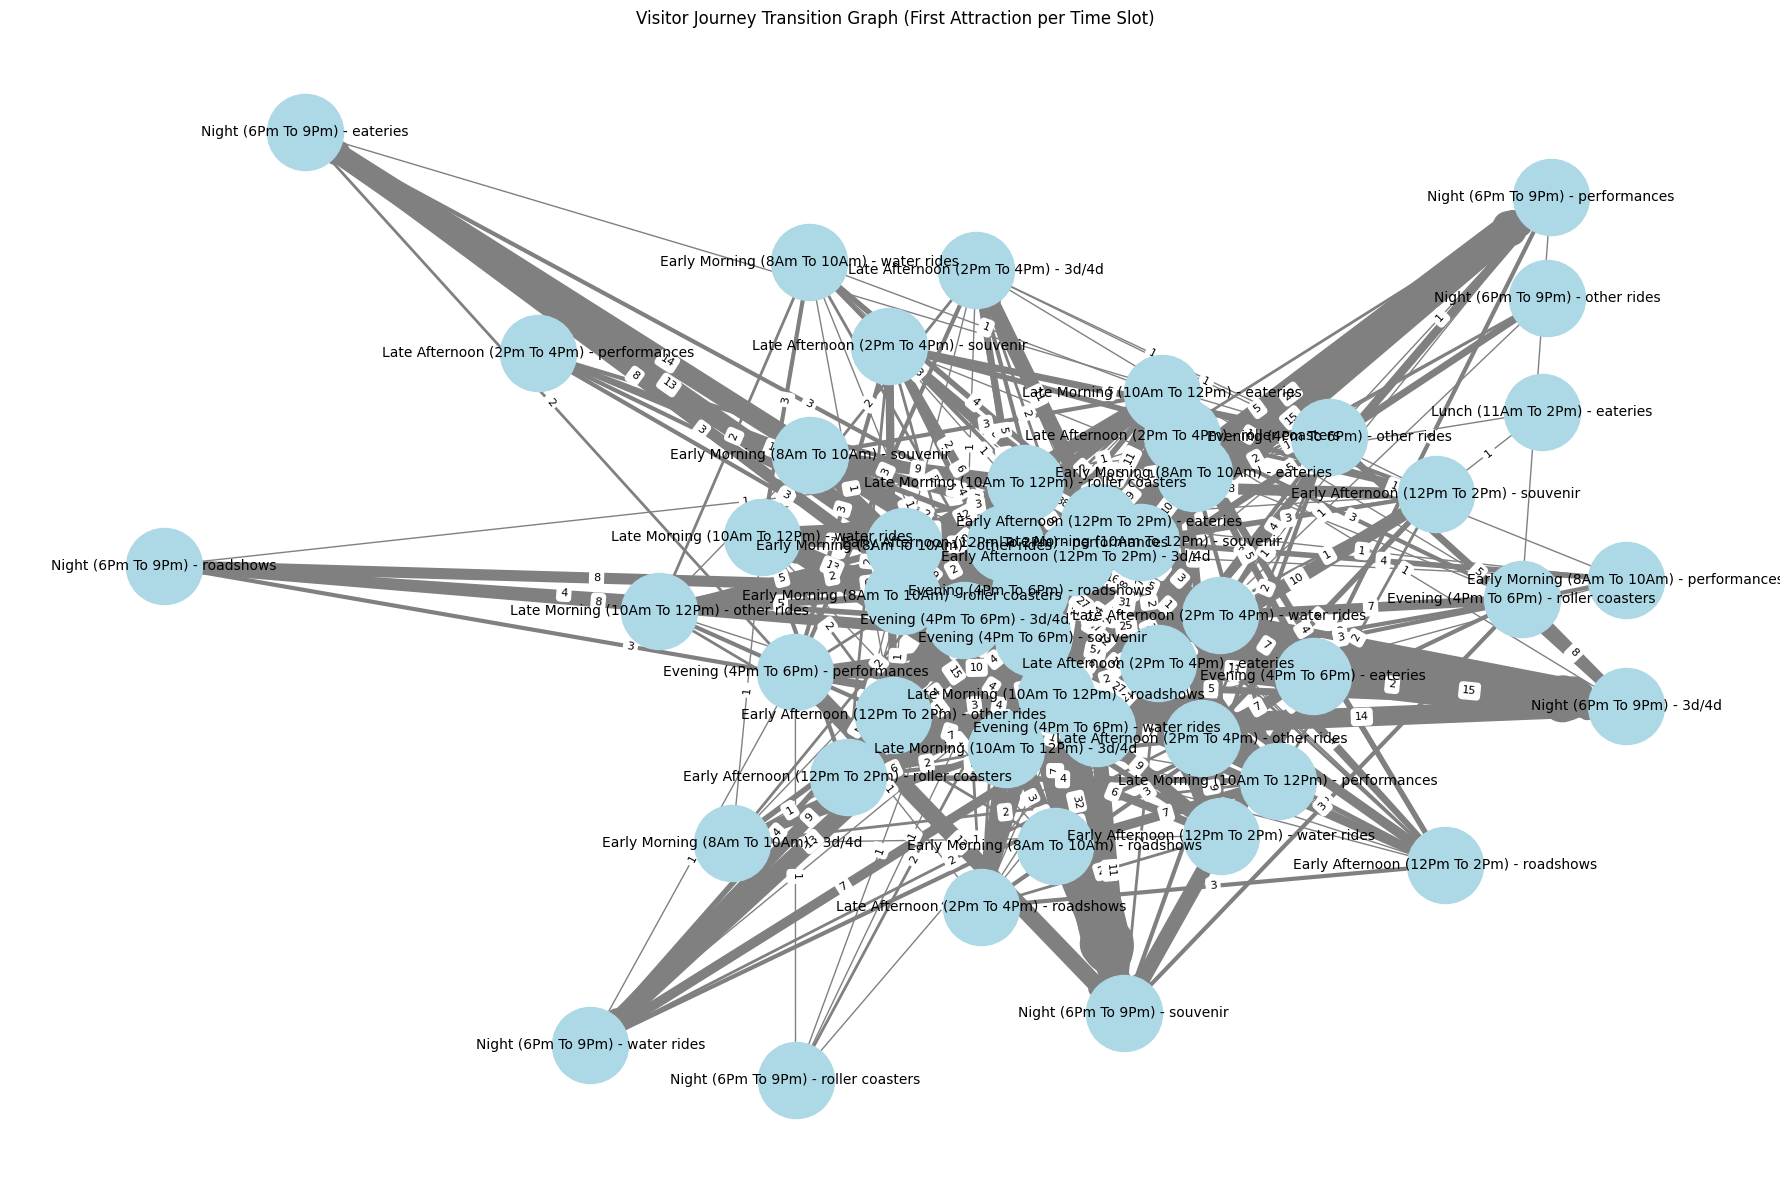

In [ ]:
# Build directed graph
G = nx.DiGraph()
for (src, tgt), weight in transition_counts.items():
    G.add_edge(src, tgt, weight=weight)

# Layout for the graph
pos = nx.spring_layout(G, k=1.5, seed=42)

plt.figure(figsize=(18, 12))

# Draw nodes
nx.draw_networkx_nodes(G, pos, node_color='lightblue', node_size=3000)

# Draw edges with weight-based width
edges = G.edges(data=True)
nx.draw_networkx_edges(
    G, pos,
    edgelist=edges,
    width=[d['weight'] for (_, _, d) in edges],
    edge_color='gray',
    arrows=True
)

# Draw labels
nx.draw_networkx_labels(G, pos, font_size=10)

# Draw edge weights (flow counts)
edge_labels = {(u, v): d['weight'] for u, v, d in edges}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=8)

plt.title("Visitor Journey Transition Graph (First Attraction per Time Slot)")
plt.axis('off')
plt.tight_layout()
plt.show()

showing full transitions will be too messy, hence we will display the top 10 most common transitions.

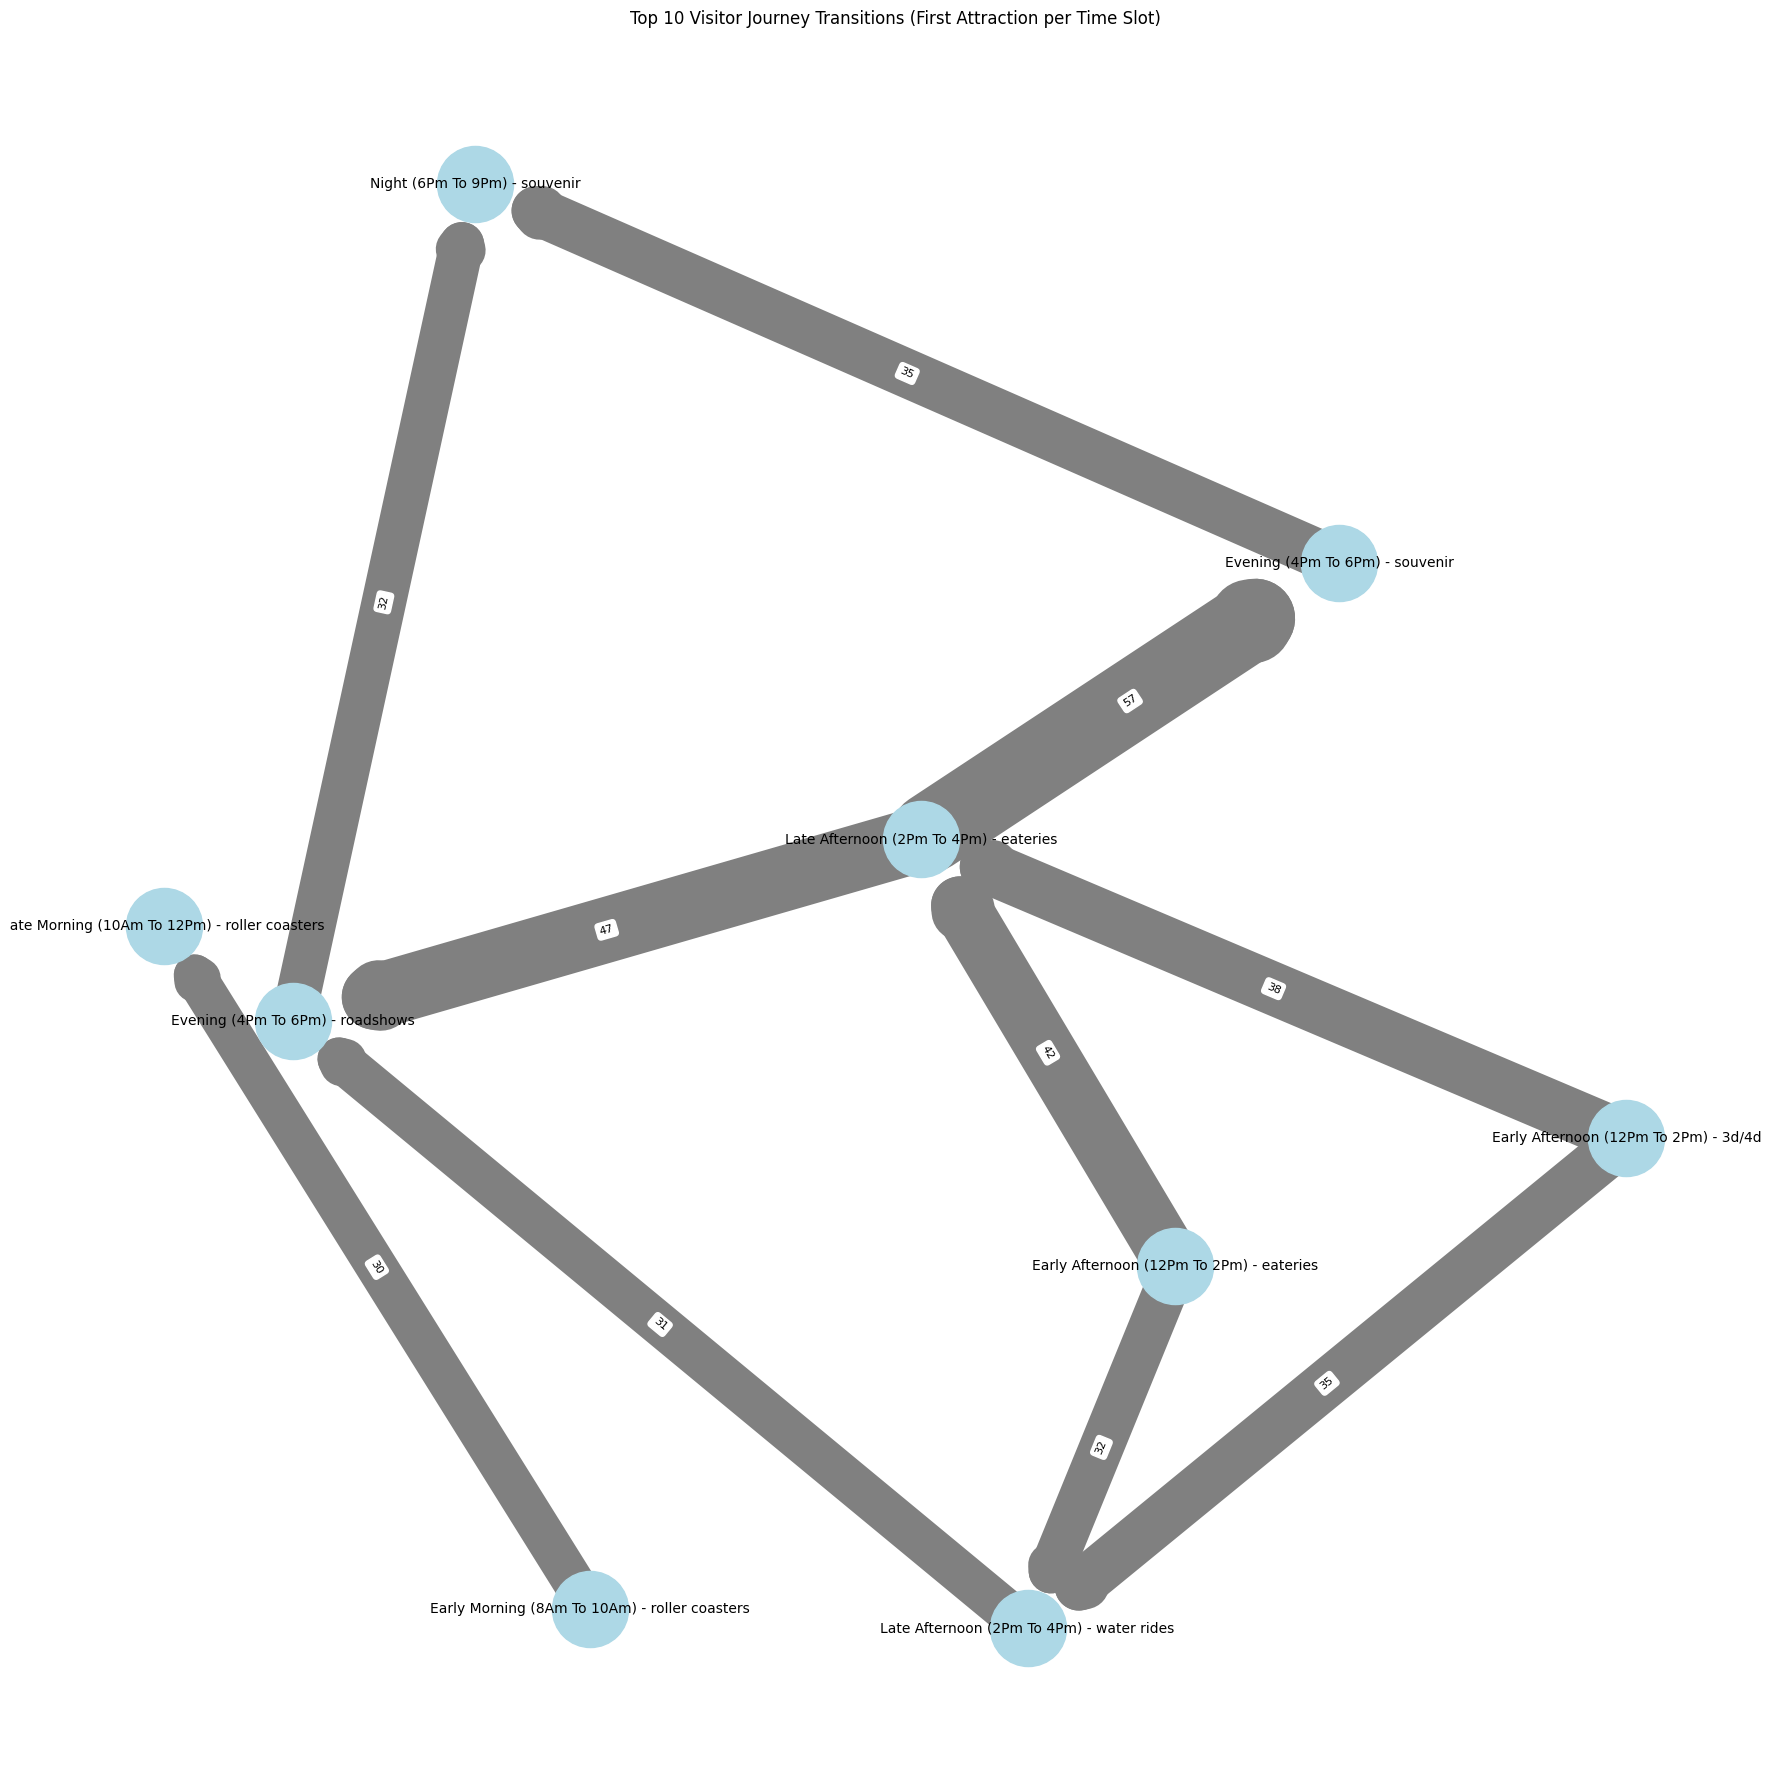

In [ ]:
#STEP 3: Keep only TOP 10 transitions
# Only keep valid consecutive time jumps
filtered_transitions = [
    (s, t, w) for (s, t), w in transition_counts.items()
    if is_valid_transition(s, t)
]

top_transitions = sorted(filtered_transitions, key=lambda x: x[2], reverse=True)[:10]

# STEP 4: Build the directed graph with top transitions
G = nx.DiGraph()
for src, tgt, weight in top_transitions:
    G.add_edge(src, tgt, weight=weight)

# STEP 5: Visualize it
pos = nx.spring_layout(G, k=3, seed=42)

plt.figure(figsize=(18, 18))

nx.draw_networkx_nodes(G, pos, node_color='lightblue', node_size=3000)

edges = G.edges(data=True)
nx.draw_networkx_edges(
    G, pos,
    edgelist=edges,
    width=[d['weight'] for (_, _, d) in edges],
    edge_color='gray',
    arrows=True
)

nx.draw_networkx_labels(G, pos, font_size=10)

edge_labels = {(u, v): d['weight'] for u, v, d in edges}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=8)

plt.title("Top 10 Visitor Journey Transitions (First Attraction per Time Slot)")
plt.axis('off')
plt.tight_layout()
plt.show()


### Insights
early morning to late morning:
- roller coasters to roller coasters
- visitors go to roller coasters in the morning


early afternoon to late afternoon:
- eateries to eateries or water rides OR
- 3d/4d to eateries or water rides
- visitors enjoy going water rides or eating at this period

late afternoon to evening:
- water rides to roadshows OR
- eateries to souvenir or roadshows
- there is a variety of paths at the period

evening to night:
- souvenir to souvenir OR
- roadshows to souvenirs
- visitors like to take the night chill by avoiding roller coasters and enjoy more peaceful activity like shopping or watching roadshow
- visitors get souveniors at the later part of the day


### By cluster

In [ ]:
# check for NAs in cluster
print(df_clean['cluster'].isna().sum())

5


In [ ]:
# Drop rows with missing cluster
df_clean = df_clean.dropna(subset=['cluster'])

In [ ]:
def is_valid_transition(src, tgt):
    time_order = [
        'Early Morning (8Am To 10Am)',
        'Late Morning (10Am To 12Pm)',
        'Lunch (11Am To 2Pm)',
        'Early Afternoon (12Pm To 2Pm)',
        'Late Afternoon (2Pm To 4Pm)',
        'Evening (4Pm To 6Pm)',
        'Night (6Pm To 9Pm)'
    ]
    try:
        return time_order.index(tgt.split(' - ')[0]) - time_order.index(src.split(' - ')[0]) == 1
    except ValueError:
        return False

Show top 10 transitions by cluster

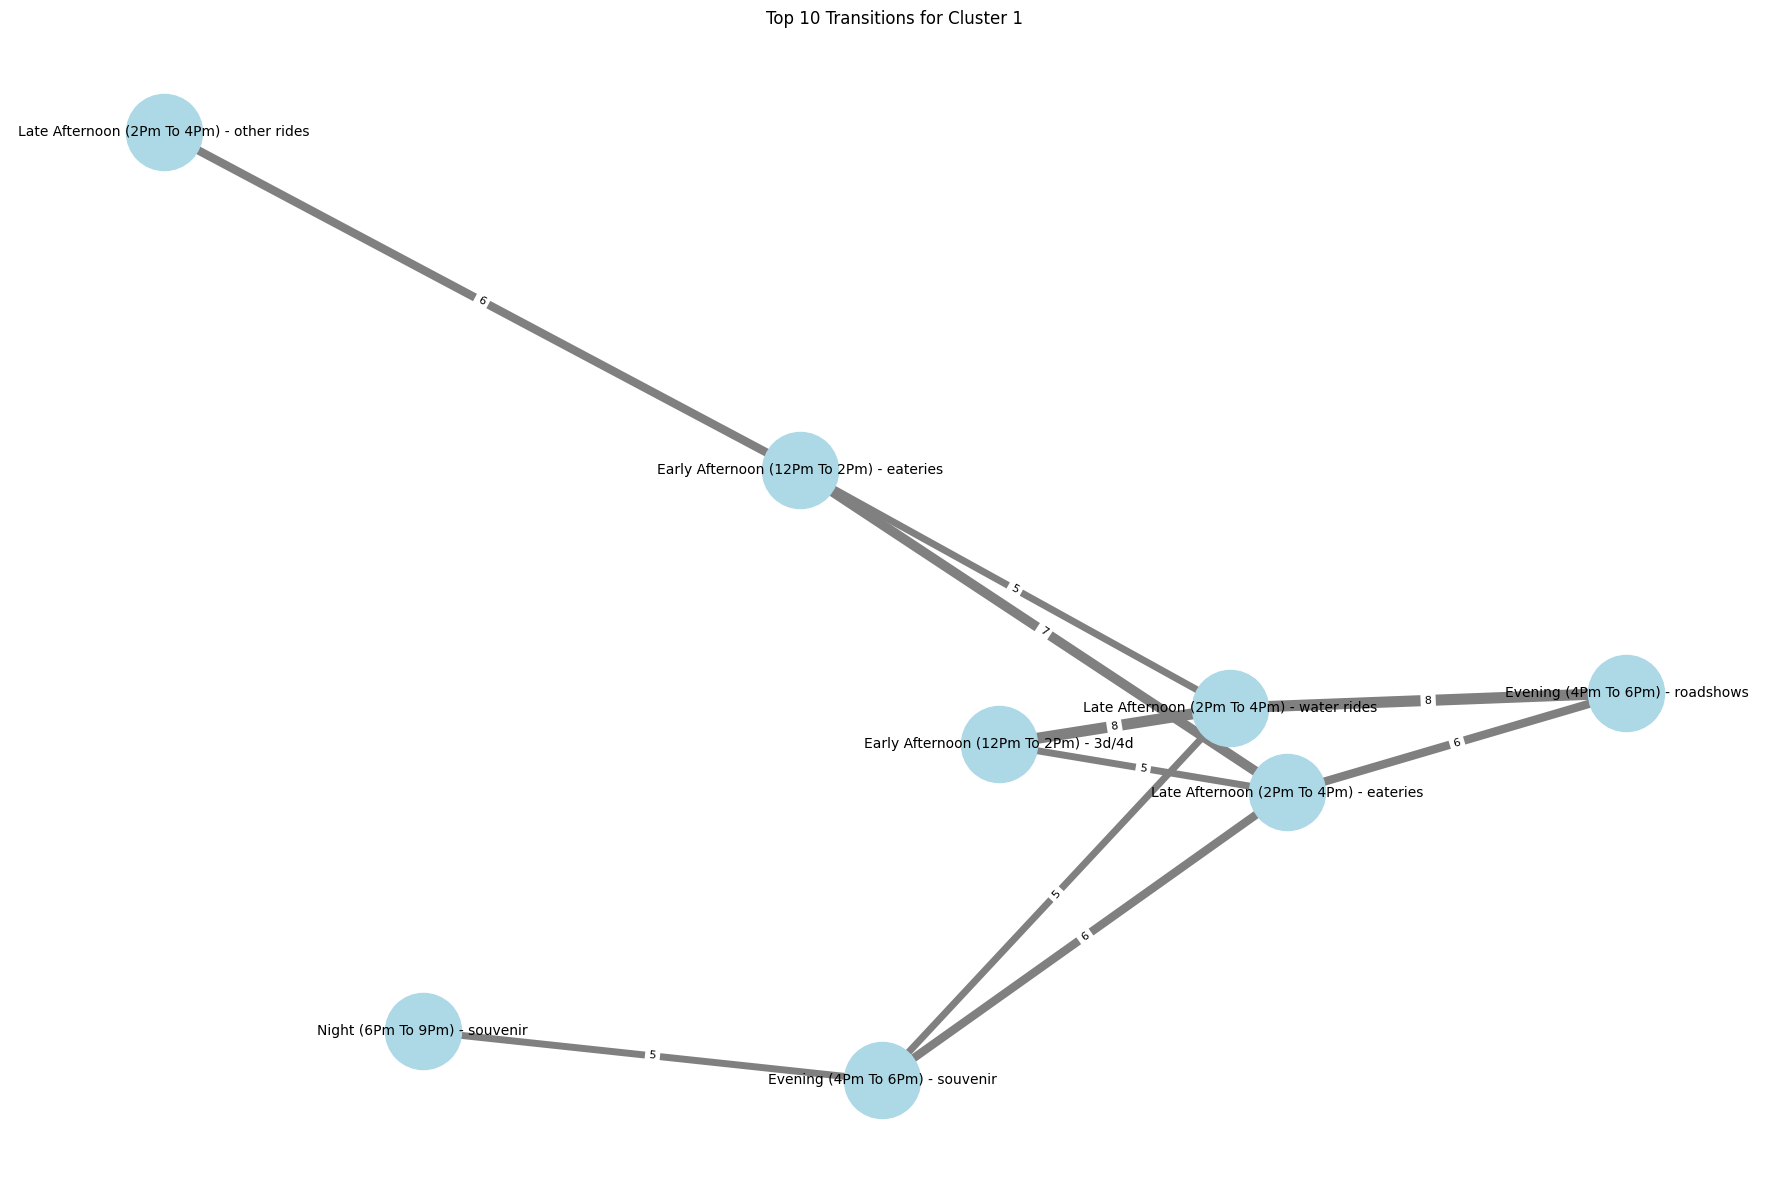

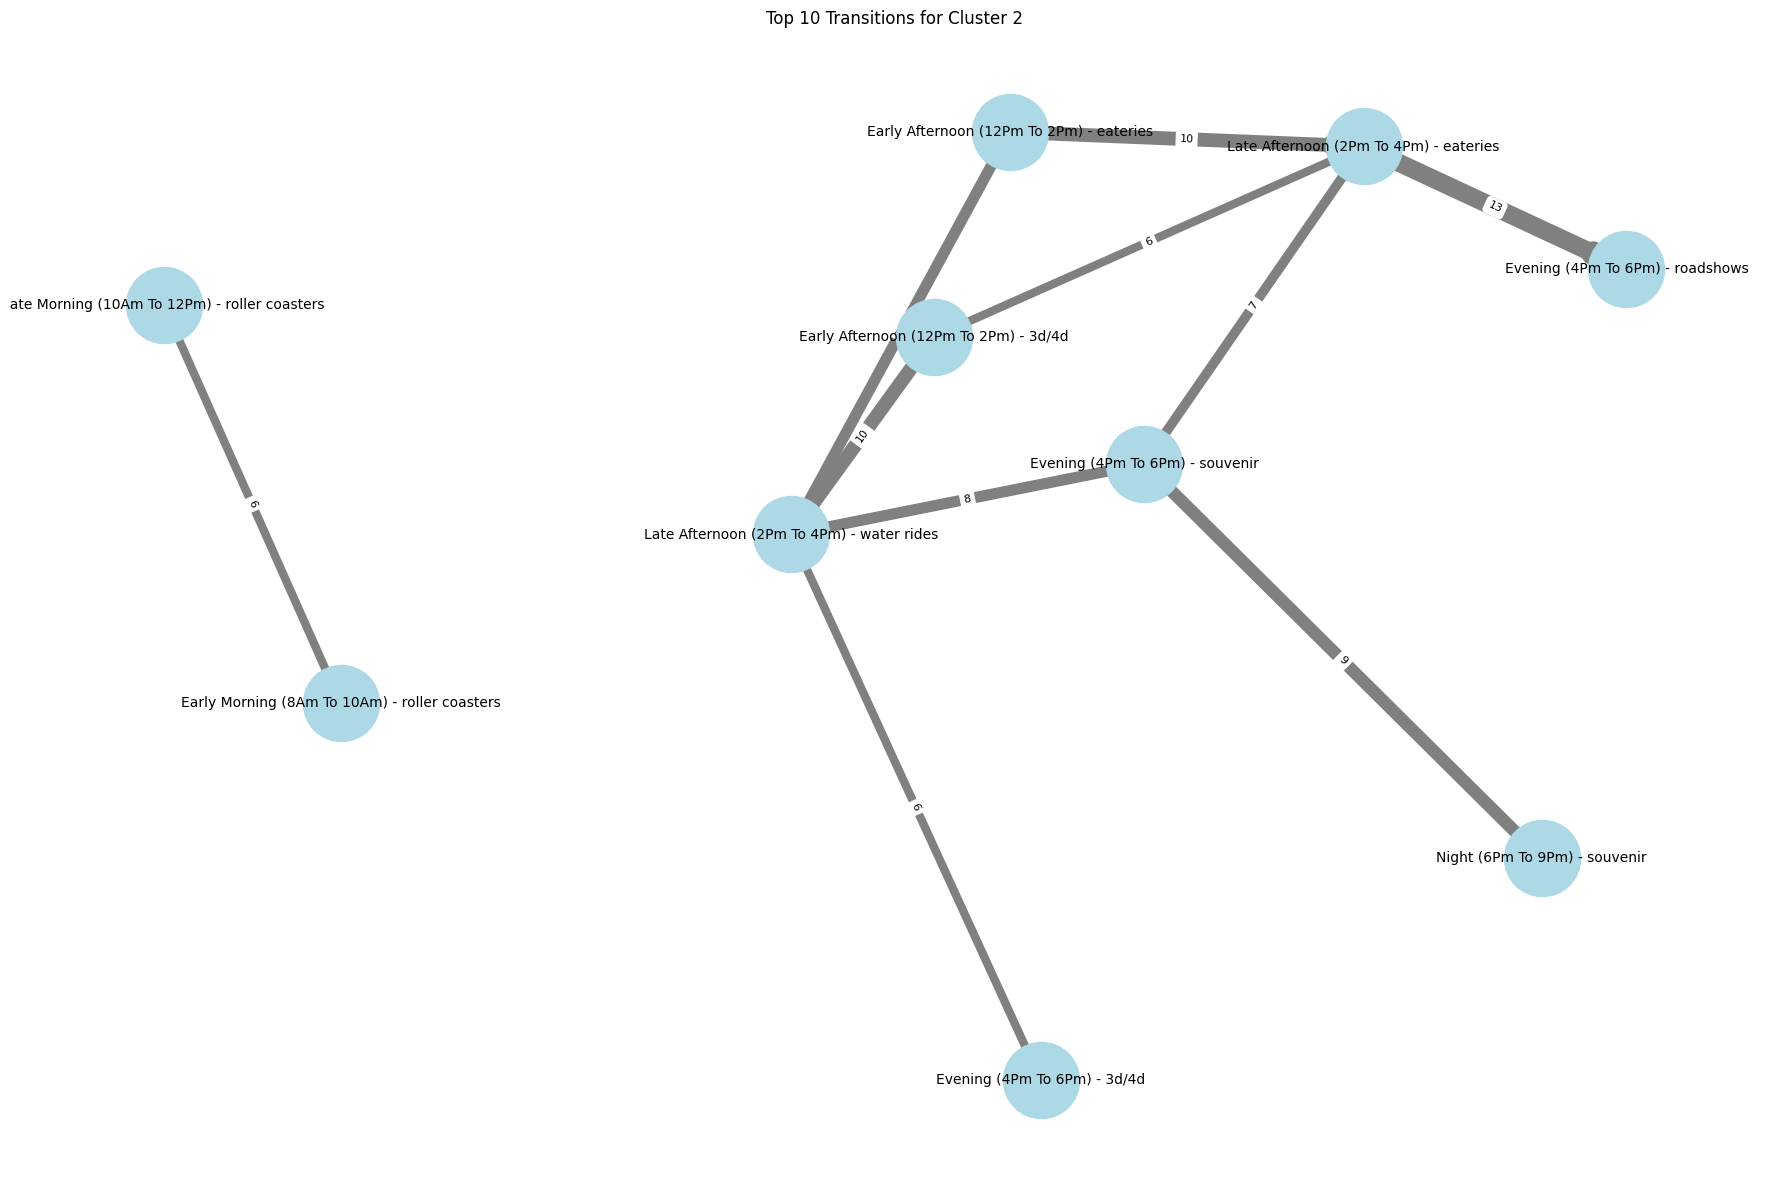

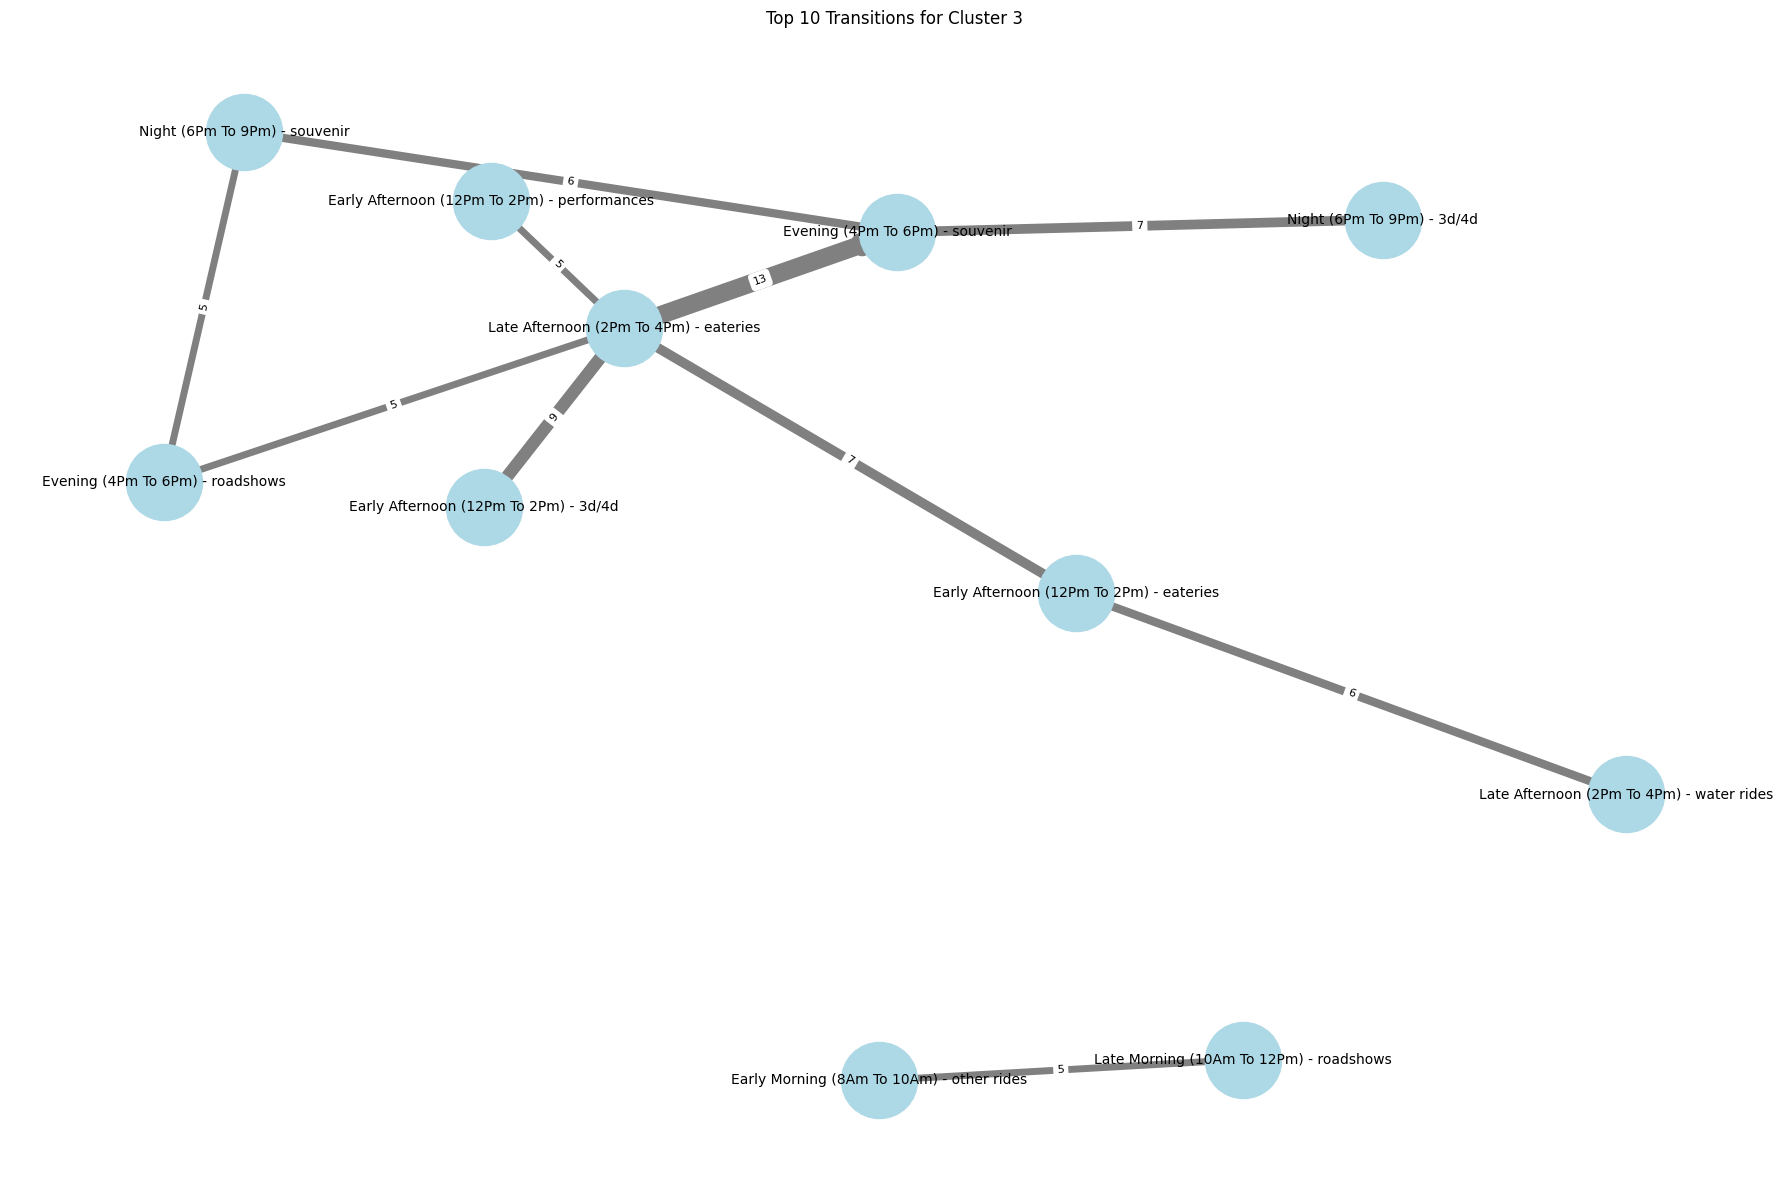

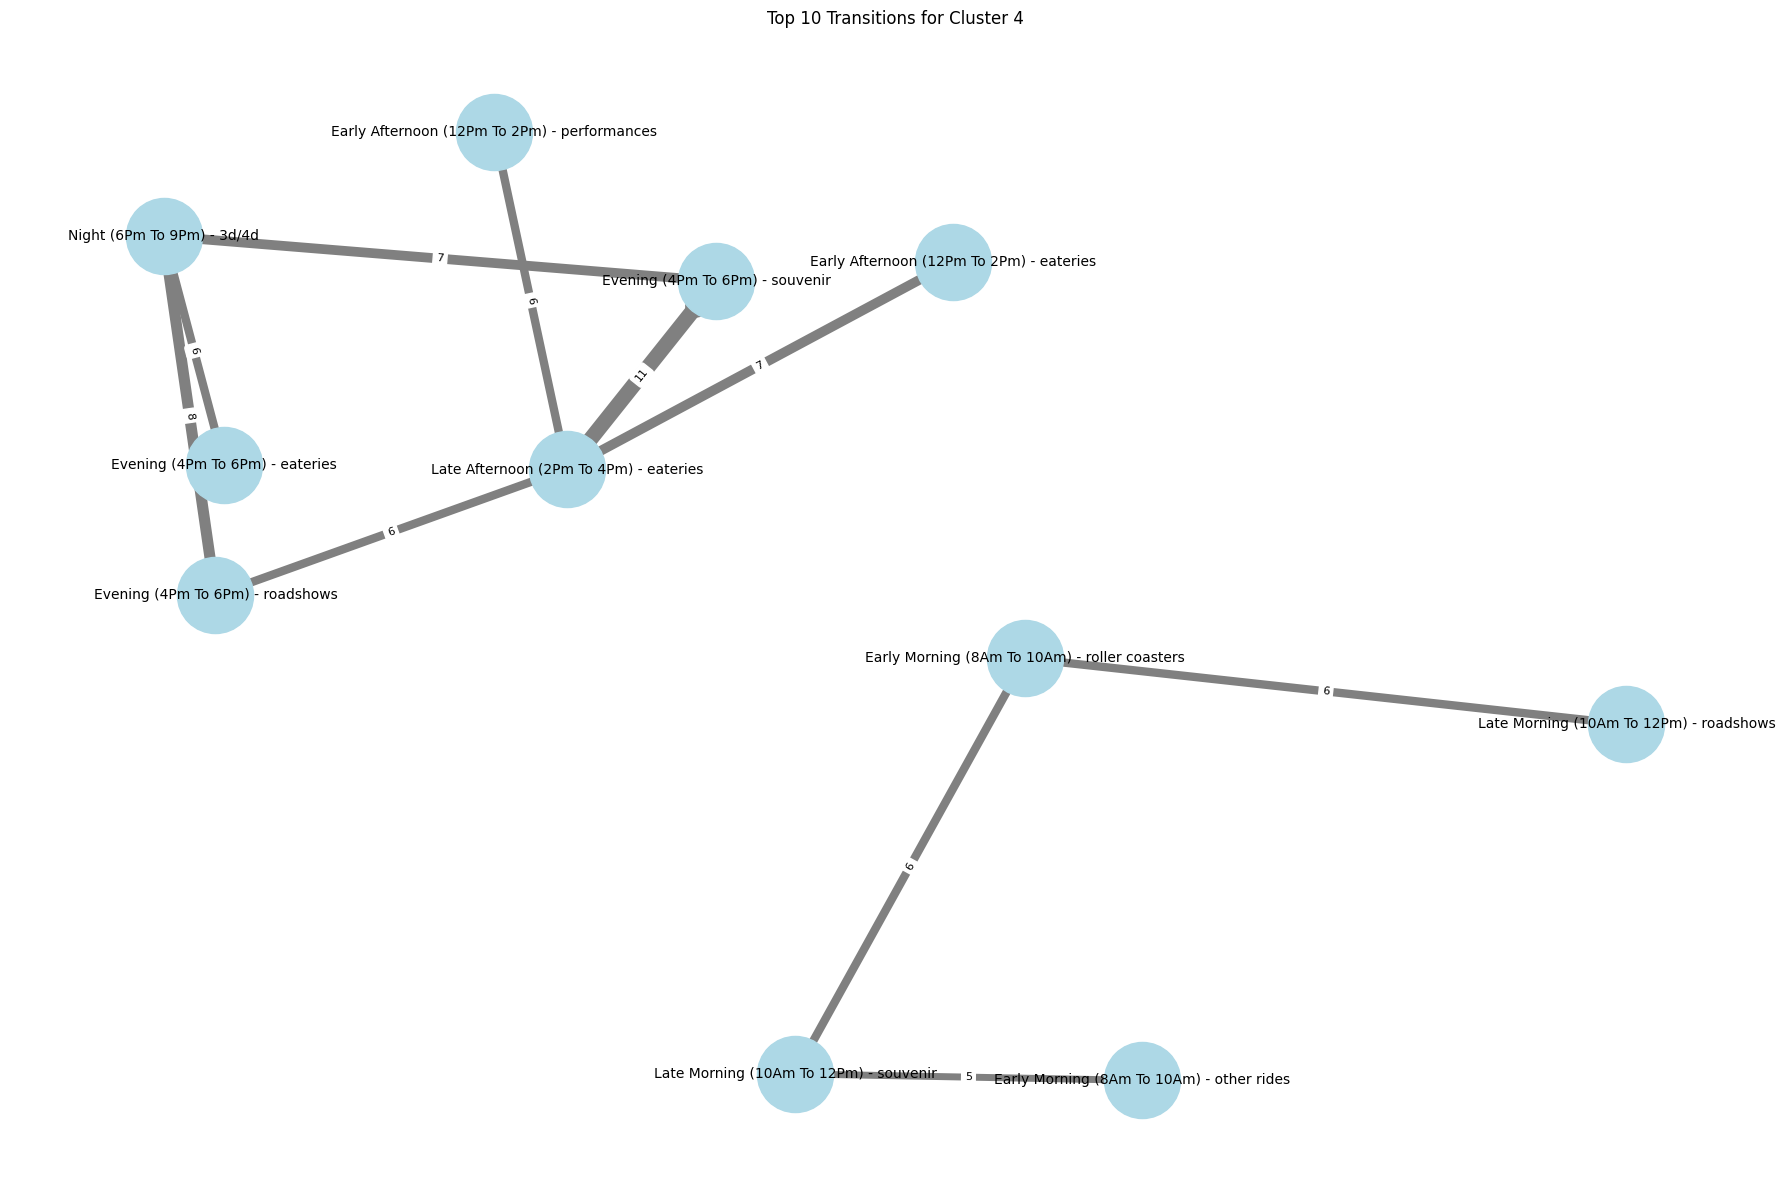

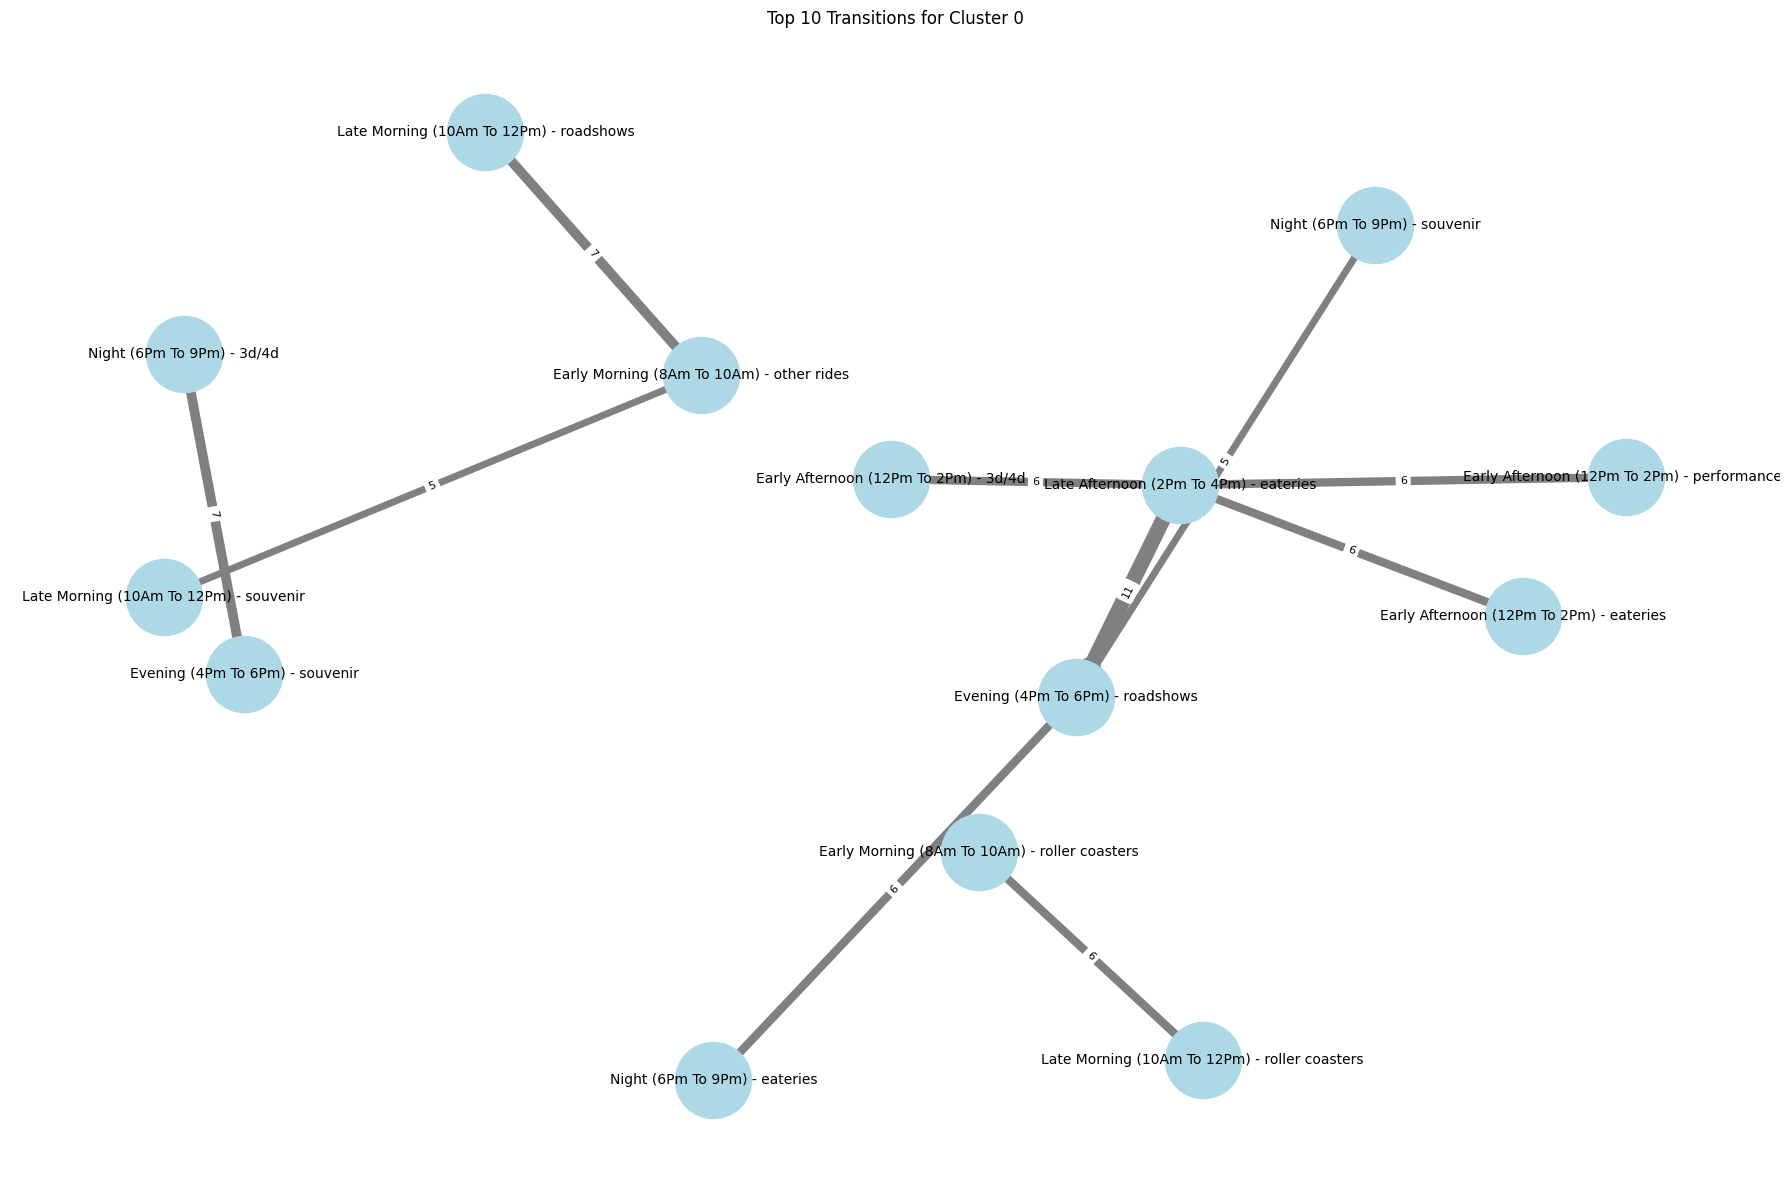

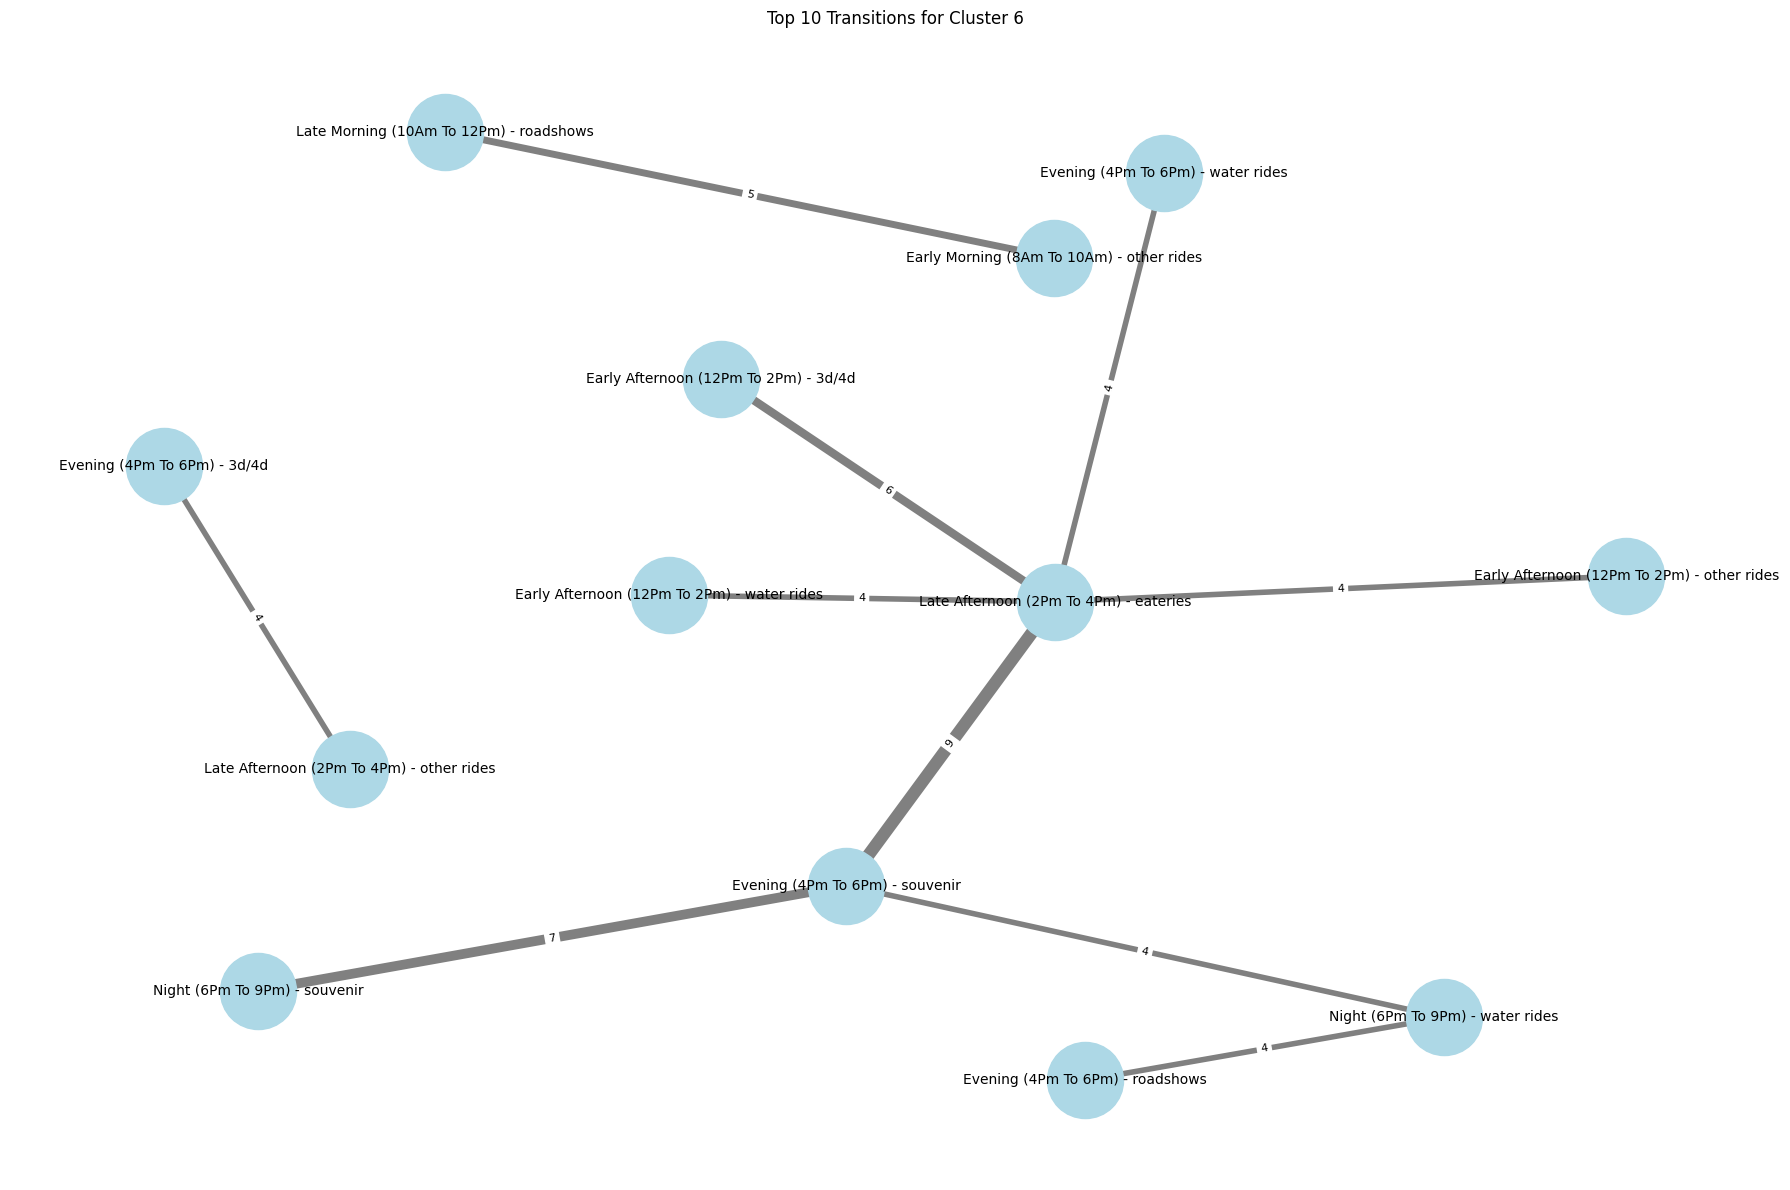

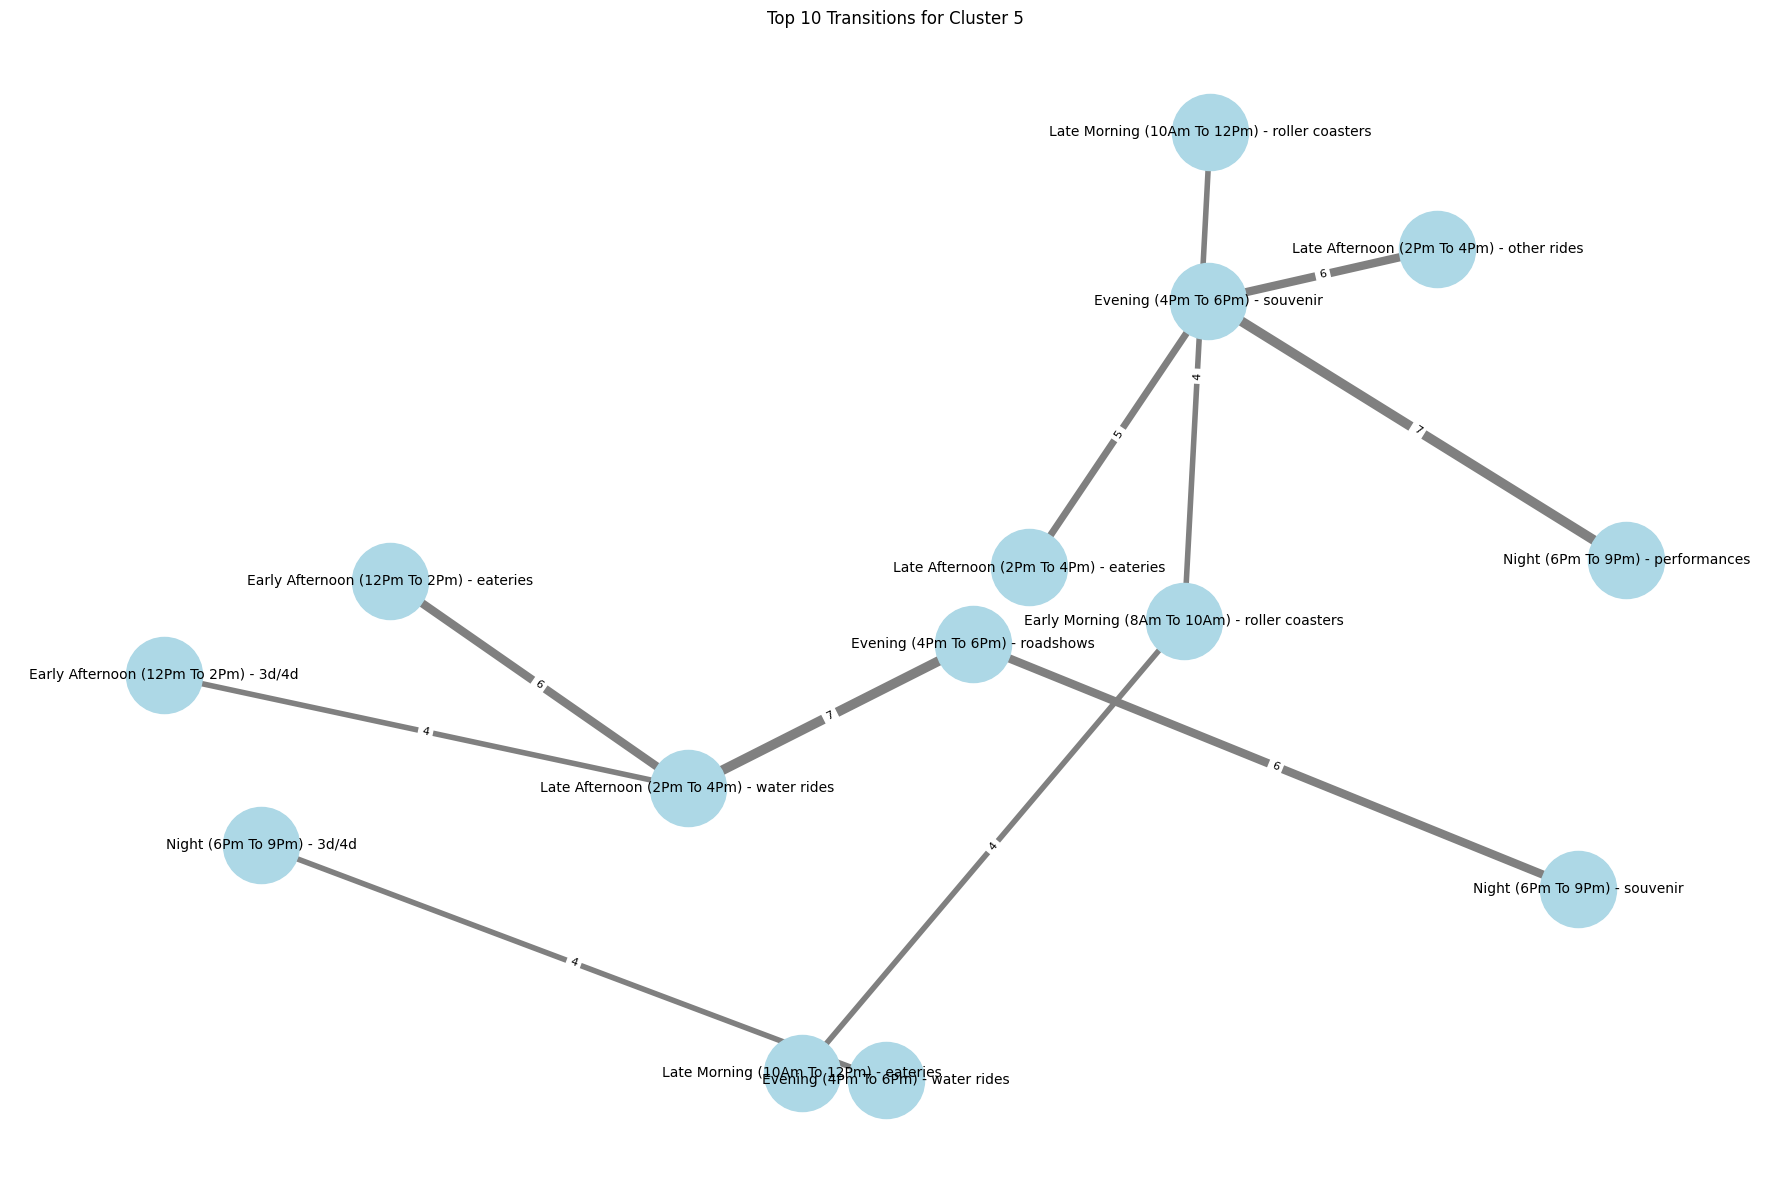

In [ ]:
for cluster_id in df_clean['cluster'].unique():
    df_cluster = df_clean[df_clean['cluster'] == cluster_id]

    #transition_pairs
    transition_pairs = []

    for path in df_cluster['first_only_string']:
        steps = path.split(' ➝ ')
        for i in range(len(steps) - 1):
            transition_pairs.append((steps[i], steps[i+1]))

    transition_counts = Counter(transition_pairs)

    filtered_transitions = [
    (s, t, w) for (s, t), w in transition_counts.items()
    if is_valid_transition(s, t)
    ]

    # Show only top 10 transitions
    top_transitions = sorted(filtered_transitions, key=lambda x: x[2], reverse=True)[:10]

    # STEP 4: Build the directed graph with top transitions
    G = nx.DiGraph()
    for src, tgt, weight in top_transitions:
        G.add_edge(src, tgt, weight=weight)

    # STEP 5: Visualize it
    pos = nx.spring_layout(G, k=1.5, seed=42)

    plt.figure(figsize=(18, 12))
    nx.draw_networkx_nodes(G, pos, node_color='lightblue', node_size=3000)

    edges = G.edges(data=True)
    nx.draw_networkx_edges(
        G, pos,
        edgelist=edges,
        width=[d['weight'] for (_, _, d) in edges],
        edge_color='gray',
        arrows=True
    )

    nx.draw_networkx_labels(G, pos, font_size=10)

    edge_labels = {(u, v): d['weight'] for u, v, d in edges}
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=8)

    plt.title(f"Top 10 Transitions for Cluster {int(cluster_id)}")
    plt.axis('off')
    plt.tight_layout()
    plt.show()


show top 5 by cluster

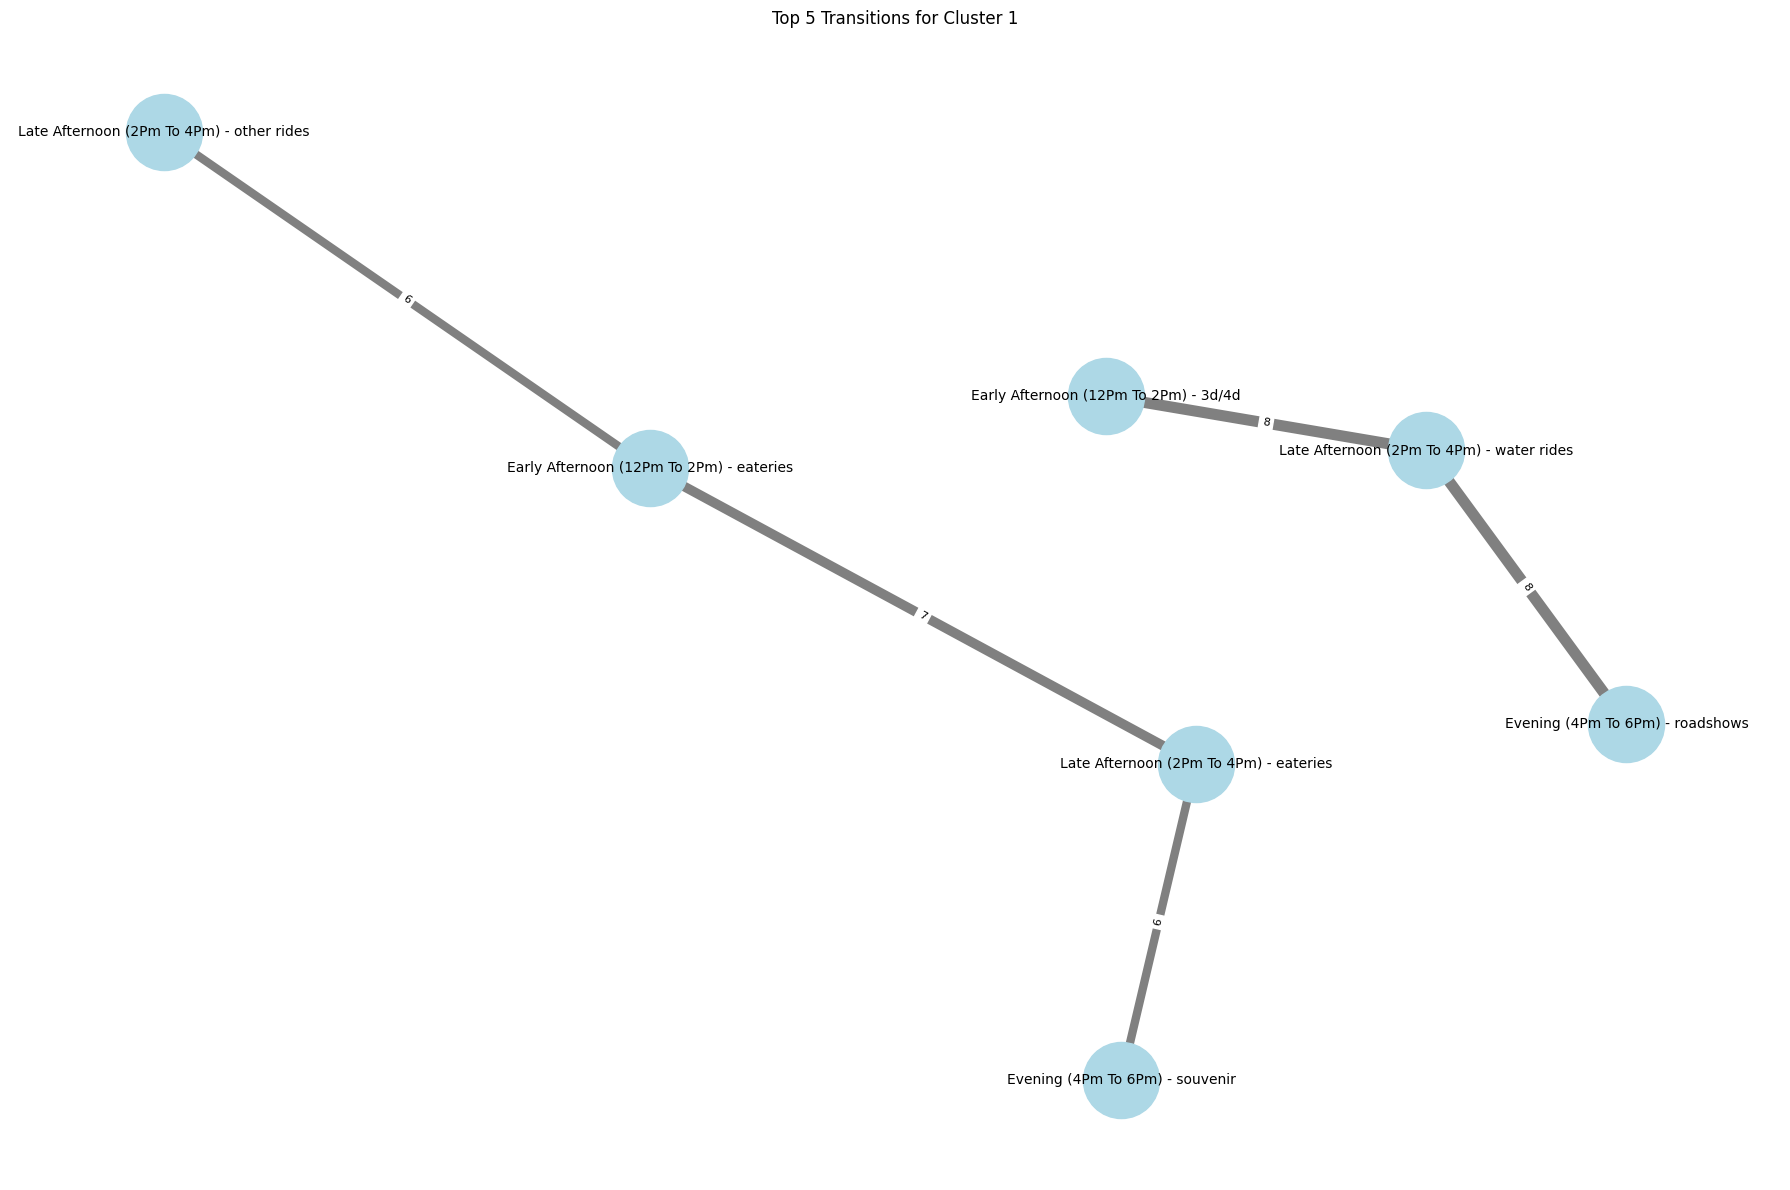

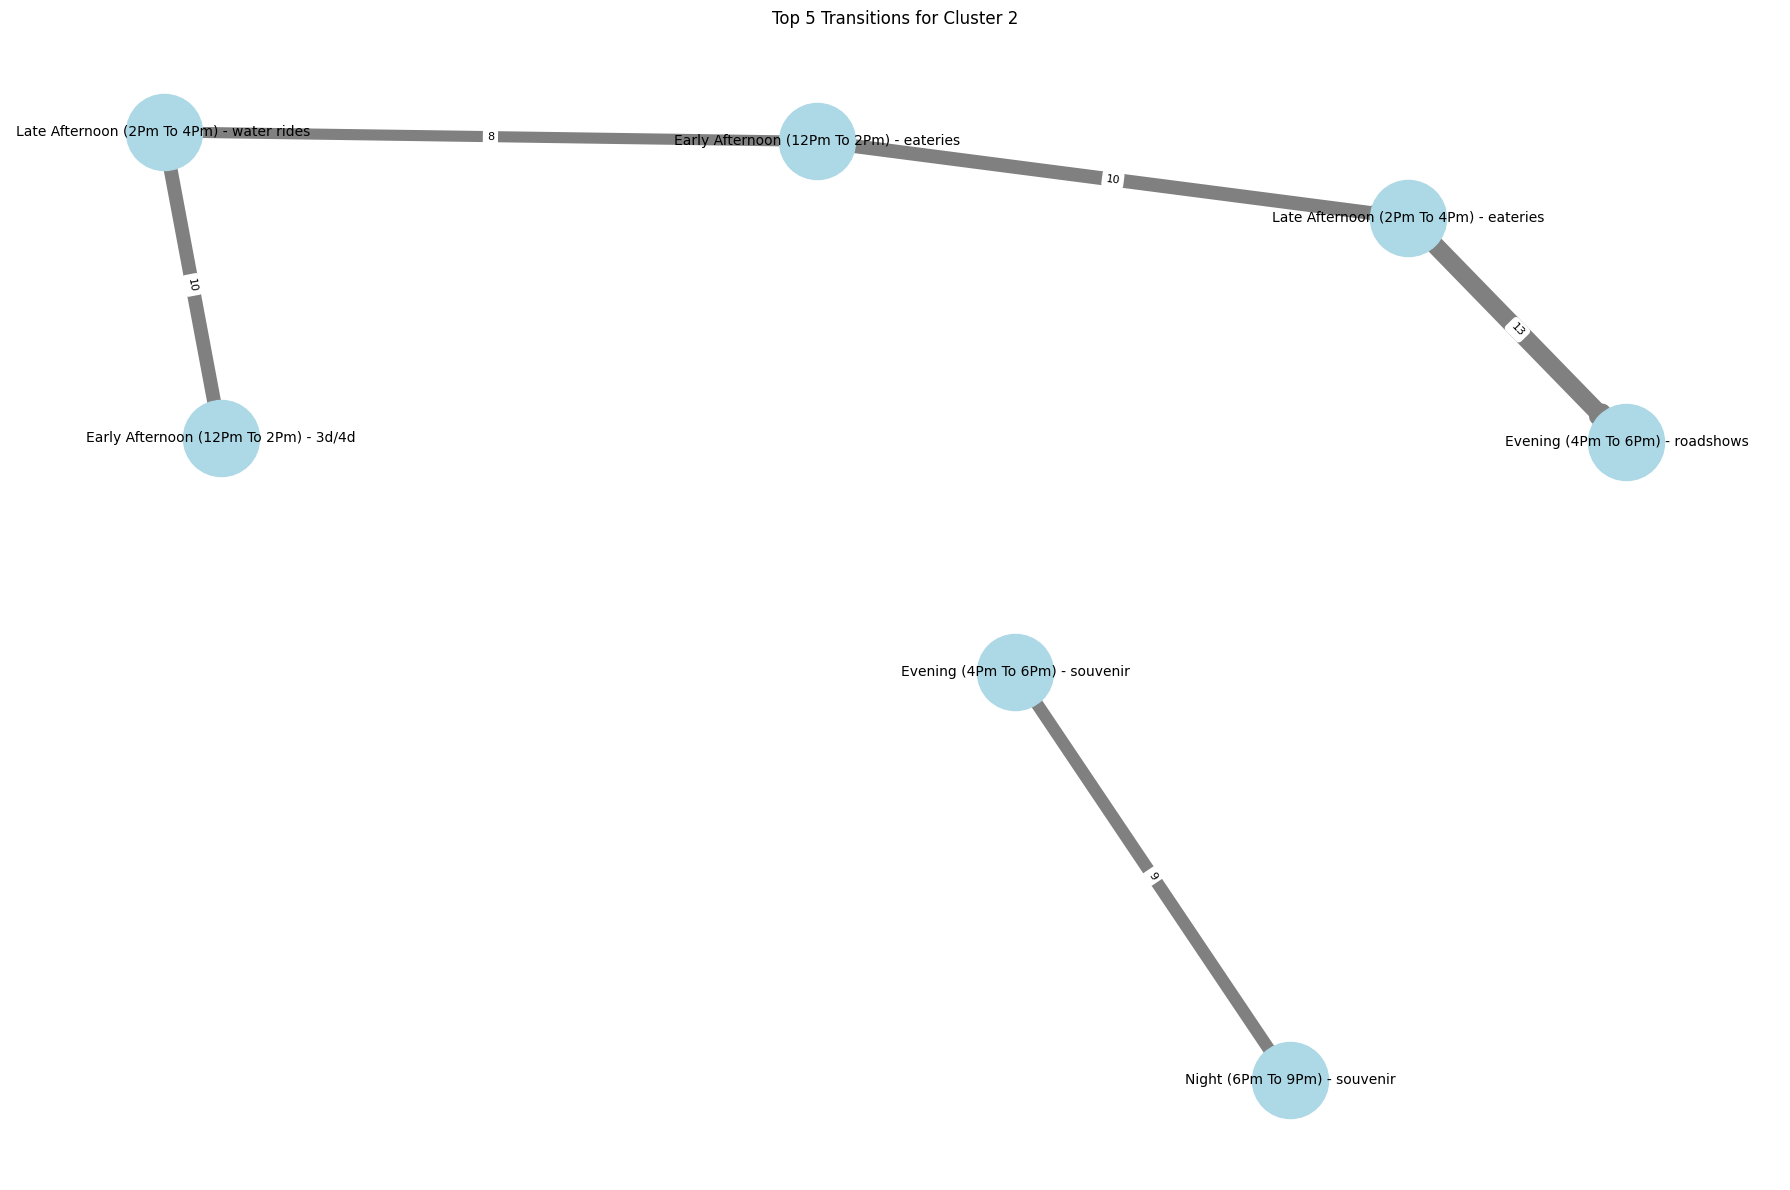

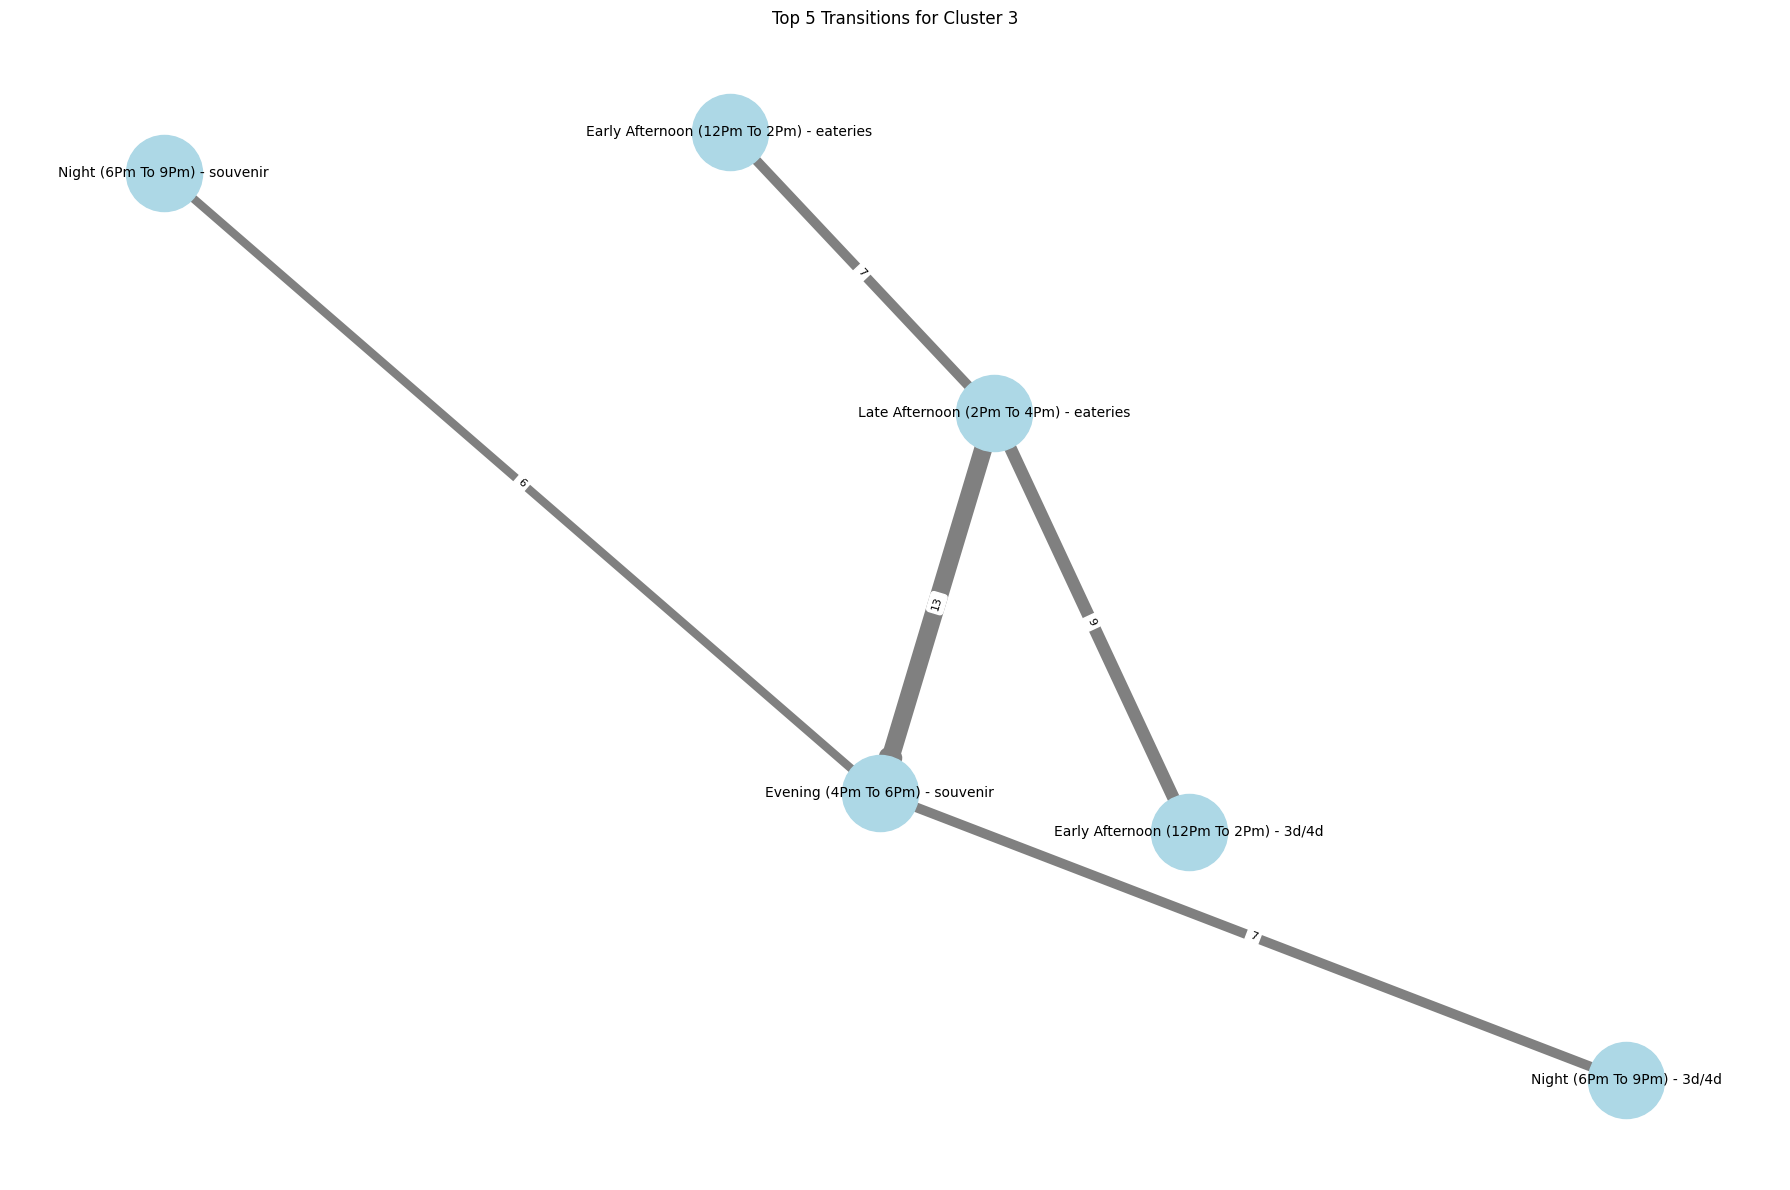

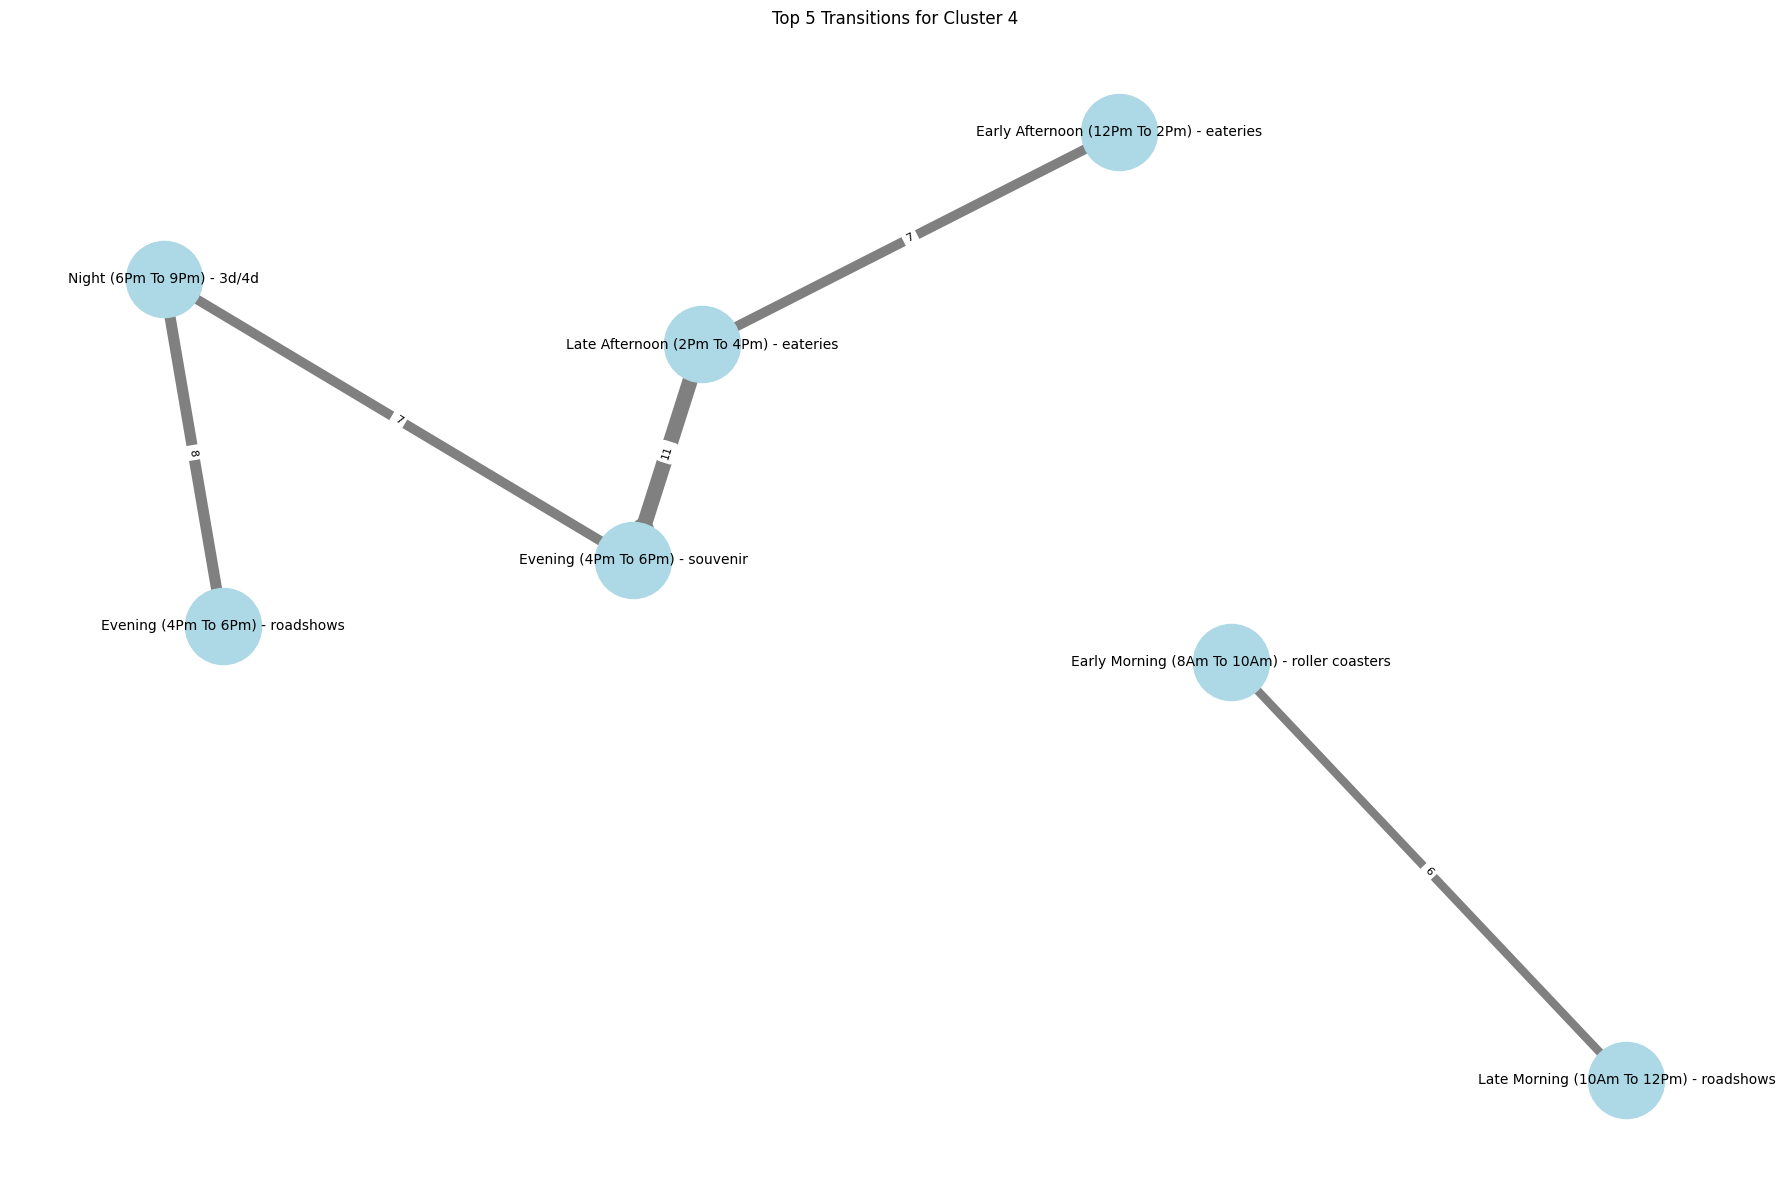

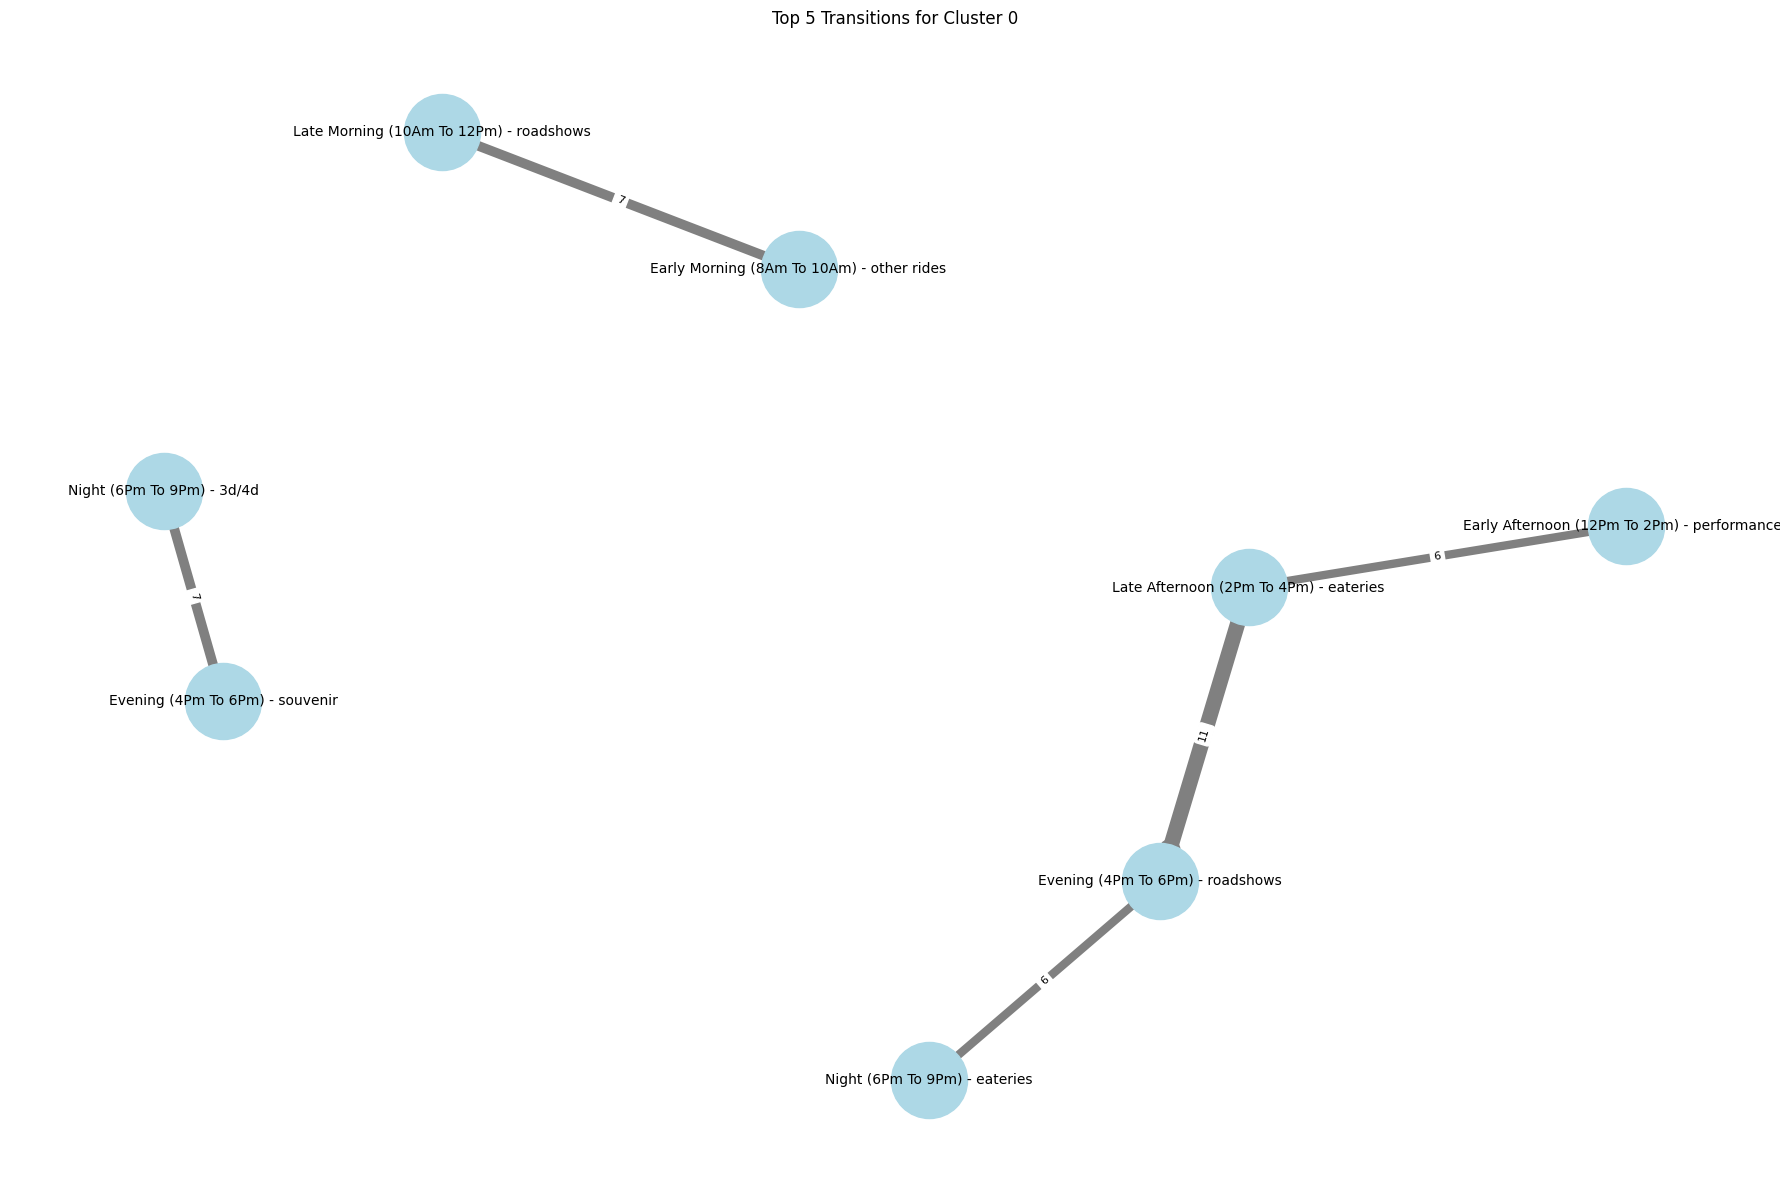

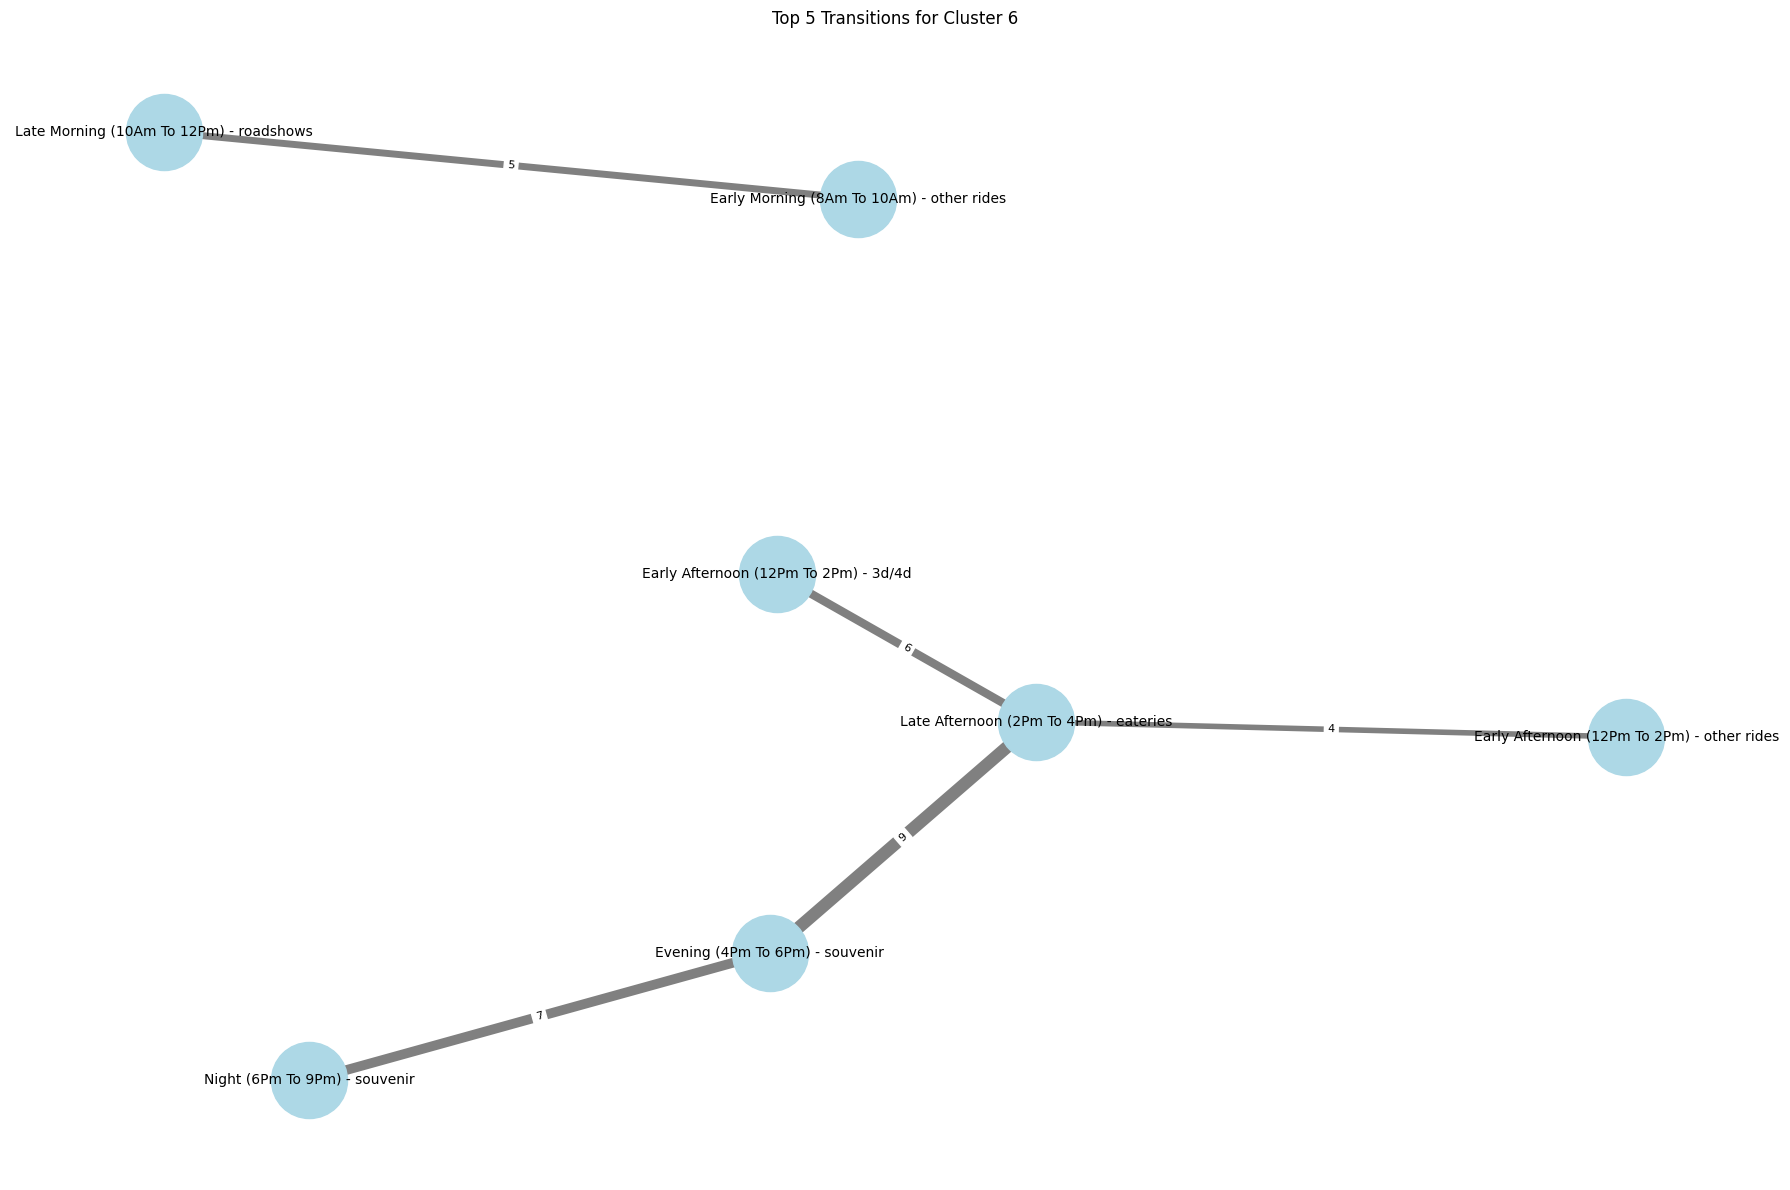

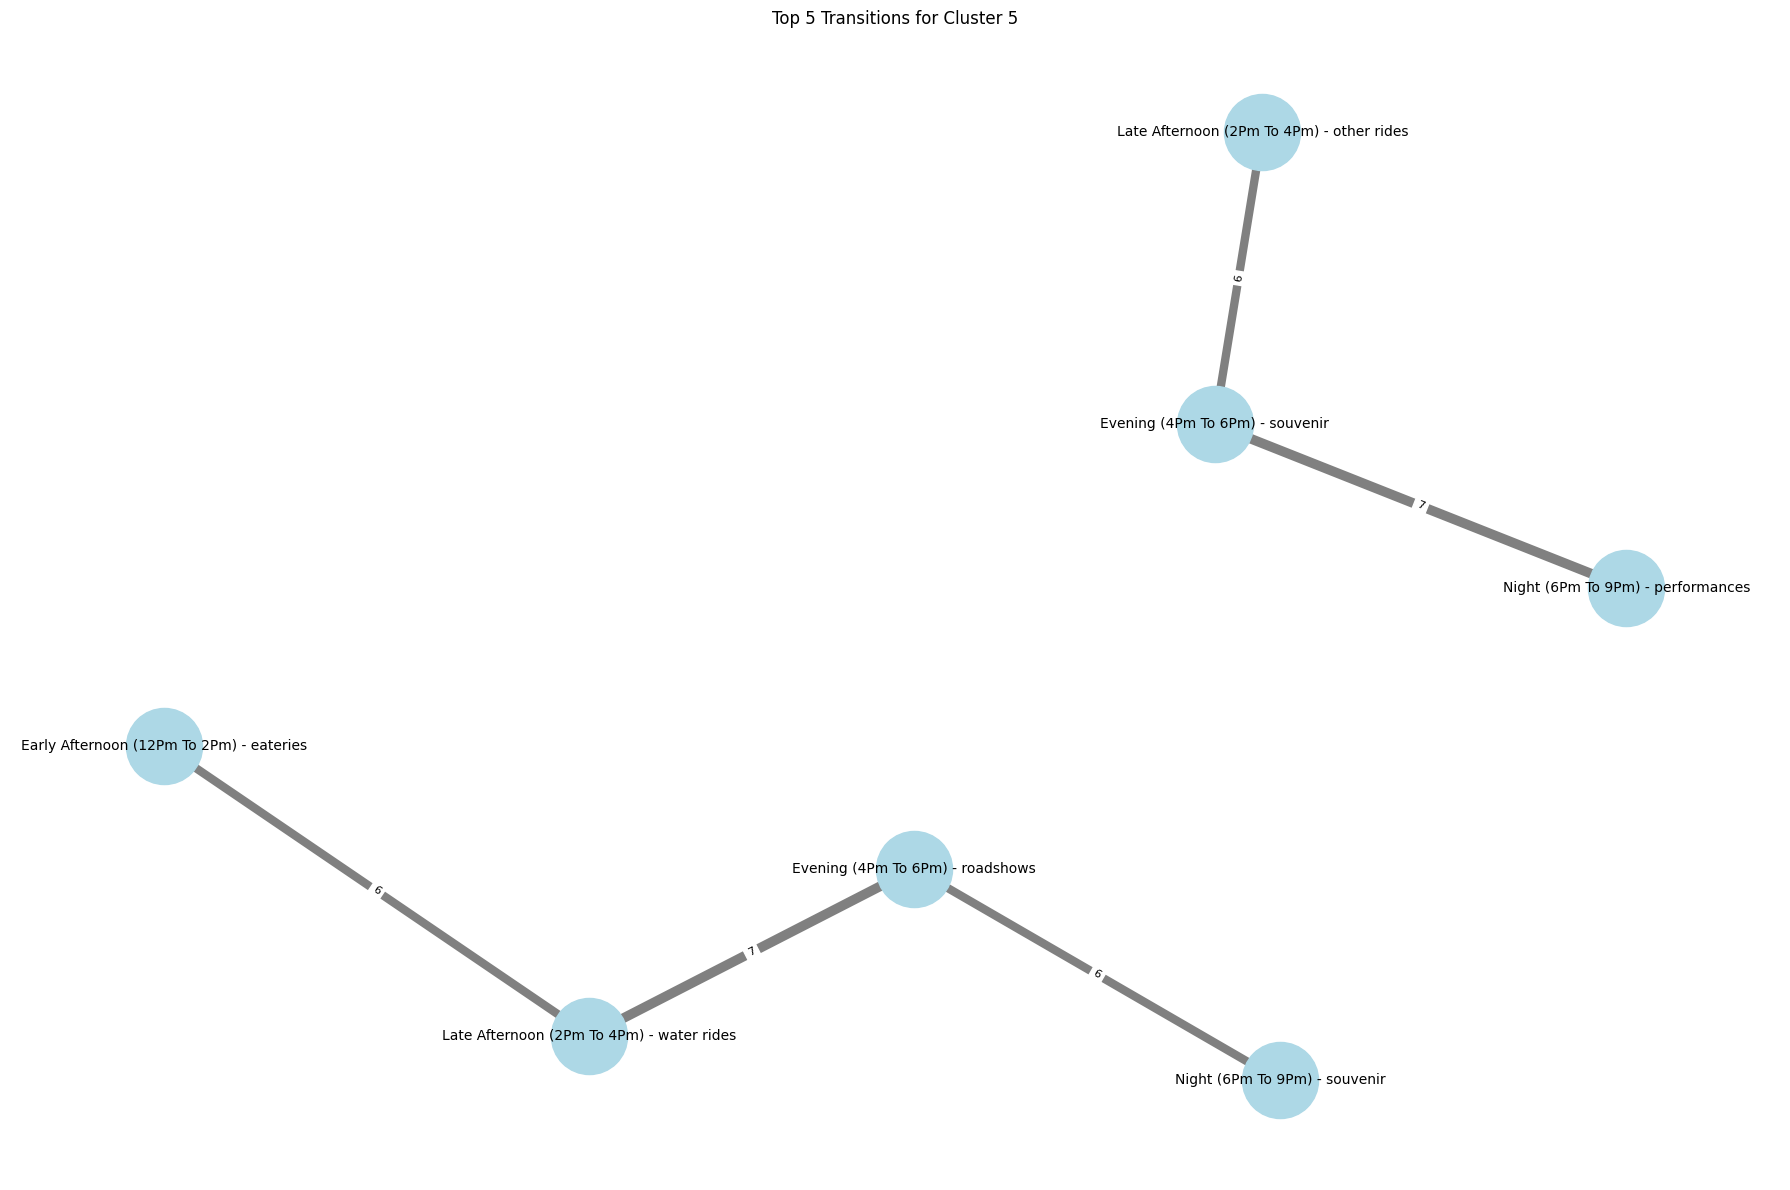

In [ ]:
for cluster_id in df_clean['cluster'].unique():
    df_cluster = df_clean[df_clean['cluster'] == cluster_id]

    #transition_pairs
    transition_pairs = []

    for path in df_cluster['first_only_string']:
        steps = path.split(' ➝ ')
        for i in range(len(steps) - 1):
            transition_pairs.append((steps[i], steps[i+1]))

    transition_counts = Counter(transition_pairs)

    filtered_transitions = [
    (s, t, w) for (s, t), w in transition_counts.items()
    if is_valid_transition(s, t)
    ]

    # Show only top 5 transitions
    top_transitions = sorted(filtered_transitions, key=lambda x: x[2], reverse=True)[:5]

    # STEP 4: Build the directed graph with top transitions
    G = nx.DiGraph()
    for src, tgt, weight in top_transitions:
        G.add_edge(src, tgt, weight=weight)

    # STEP 5: Visualize it
    pos = nx.spring_layout(G, k=1.5, seed=42)

    plt.figure(figsize=(18, 12))
    nx.draw_networkx_nodes(G, pos, node_color='lightblue', node_size=3000)

    edges = G.edges(data=True)
    nx.draw_networkx_edges(
        G, pos,
        edgelist=edges,
        width=[d['weight'] for (_, _, d) in edges],
        edge_color='gray',
        arrows=True
    )

    nx.draw_networkx_labels(G, pos, font_size=10)

    edge_labels = {(u, v): d['weight'] for u, v, d in edges}
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=8)

    plt.title(f"Top 5 Transitions for Cluster {int(cluster_id)}")
    plt.axis('off')
    plt.tight_layout()
    plt.show()

###  Cluster-Based Transition Highlights

| Cluster                      | Early Morning → Morning           | Early Afternoon → Late Afternoon                    | Late Afternoon → Evening                                  | Evening → Night                         |
|-----------------------------|-----------------------------------|-----------------------------------------------------|------------------------------------------------------------|------------------------------------------|
| 0                           | other rides → roadshows           | other rides → eateries or other rides               | other rides → roadshows                                    | roadshows → other rides                  |
| 1                           |  *(no data)*      | other or 3d/4d  → other rides    | other rides → other rides or 3d/4d or roadshows                                               | *(no data)*                              |
| 2                         | *(no data)*      | other rides or 3d/4d → other rides;<br>roller coasters → roller coasters | roller coaster → 3d/4d              | roadshows → roadshows                                                                |
| 3                           | 3d/4d → roller coasters           | 3d/4d → other rides                                 | other rides → other rides or roadshows                     | roller coasters → other rides            |
| 4                           | roller coasters → roadshows       | roadshows → roller coasters                         | roller coasters → 3d/4d;<br>other rides → roller coasters | roadshows → roadshows                    |
| 5 | *(no data)*                       | roadshows or 3d/4d → other rides                    | souvenir → roller coasters                                 | roadshows or 3d/4d → roadshows           |
| 6        | souvenir → roller coasters        | other rides → souvenir                              | souvenir → performance                                     | performance → other rides                |



Cluster 0:
* loves other rides and roadshows at all times of the day


Cluster 1:
* loves other rides and 3d/4d experience

Cluster 2:
* loves roller coasters and other rides from early afternoon to evening
* loves roadshows from evening to night

Cluster 3:
* loves 3d/4d in early morning or early afternoon
* loves roller coaster and other rides throughout the day, even at night!

Cluster 4:  
* loves rotating between rollercoaster and roadshows in the day
* loves roadshow at night

Cluster 5:
* loves roadshows in early afternoon and at night

Cluster 6:
* loves souvenir and performance, with roller coasters and other rides in between
